In [348]:
import pandas as pd
import numpy as np
import os
from io import StringIO
import re
import csv

from tabulate import tabulate


import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import graphviz
import seaborn as sns

from sklearn import preprocessing
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
# from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import plot_partial_dependence


%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 400)

os.getcwd()



'/Users/lubagloukhov/Documents/Consulting/PiqueSolutions/JavaSE_202007/scripts'

In [57]:
mod_df = pd.read_csv('../data/output/mod_df.csv')  
catg_dummy_list = open('../data/output/catg_dummy_list.csv').read().splitlines()
cont_dummy_list = open('../data/output/cont_dummy_list.csv').read().splitlines()
dummy0_dummy_list = open('../data/output/dummy0_dummy_list.csv').read().splitlines()
exlc_dummy_list = open('../data/output/exlc_dummy_list.csv').read().splitlines()

In [58]:

y0_list = ['Sat_Org_EclipseIDE',
 'Sat_Org_IntelliJIDE',
 'Sat_Org_JDeveloper',
 'Sat_Org_NetBeansIDE',
 'Sat_Org_RationalAppDev',
 'Sat_Org_VisualStudio',
 'Sat_Org_Other']
y1_list = ['Sat_Org_JavaSEAMC',
 'Sat_Org_JavaSEAMC_UsageLog',
 'Sat_Org_JavaSEDepRuleSet',
 'Sat_Org_JavaSEMSICustTools',
 'Sat_Org_JavaSEFlightRec']
y2_list = ['OJavaSESubscription_Elem_Sat_Org_ContinuedInvest',
 'OJavaSESubscription_Elem_Sat_Org_PatchesOlderV',
 'OJavaSESubscription_Elem_Sat_Org_JavaWebStartUpdates',
 'OJavaSESubscription_Elem_Sat_Org_DesktopManageUpdates',
 'OJavaSESubscription_Elem_Sat_Org_AutoUpdateTools',
 'OJavaSESubscription_Elem_Sat_Org_Monitoring',
 'OJavaSESubscription_Elem_Sat_Org_MyOSupport',
 'OJavaSESubscription_Elem_Sat_Org_AccessCloud',
 'OJavaSESubscription_Elem_Sat_Org_FlexLicensing',
 'OJavaSESubscription_Elem_Sat_Org_LegacyJava',
 'OJavaSESubscription_Elem_Sat_Org_Other']
y3_list = ['OJavaSESubscription_Attr_Sat_CommMethods',
 'OJavaSESubscription_Attr_Sat_PhoneSupport',
 'OJavaSESubscription_Attr_Sat_SSKnowledge',
 'OJavaSESubscription_Attr_Sat_CoNeedsUnd',
 'OJavaSESubscription_Attr_Sat_TrainingQual',
 'OJavaSESubscription_Attr_Sat_RepsonseTime']

In [4]:
y1_var = mod_df[y1_list].sum(axis=1,skipna=True)
y2_var = mod_df[y2_list].sum(axis=1,skipna=True)
y3_var = mod_df[y3_list].sum(axis=1,skipna=True)

y23_var = mod_df[y2_list+y3_list].sum(axis=1,skipna=True)
y123_var = mod_df[y1_list + y2_list+y3_list].sum(axis=1,skipna=True)
# y23_var = mod_df[y2_list+y3_list].mean(axis=1,skipna=True)

In [143]:
x0_list = ['Use_Org_EclipseIDE',
 'Use_Org_IntelliJIDE',
 'Use_Org_JDeveloper',
 'Use_Org_NetBeansIDE',
 'Use_Org_RationalAppDev',
 'Use_Org_VisualStudio',
 'Use_Org_Other']

x1_list = ['Use_Org_JavaSEAMC',
 'Use_Org_JavaSEAMC_UsageLog',
 'Use_Org_JavaSEDepRuleSet',
 'Use_Org_JavaSEMSICustTools',
 'Use_Org_JavaSEFlightRec']
x2_list = ['OJavaSESubscription_Elem_Imp_Org_ContinuedInvest',
 'OJavaSESubscription_Elem_Imp_Org_PatchesOlderV',
 'OJavaSESubscription_Elem_Imp_Org_JavaWebStartUpdates',
 'OJavaSESubscription_Elem_Imp_Org_DesktopManageUpdates',
 'OJavaSESubscription_Elem_Imp_Org_AutoUpdateTools',
 'OJavaSESubscription_Elem_Imp_Org_Monitoring',
 'OJavaSESubscription_Elem_Imp_Org_MyOSupport',
 'OJavaSESubscription_Elem_Imp_Org_AccessCloud',
 'OJavaSESubscription_Elem_Imp_Org_FlexLicensing',
 'OJavaSESubscription_Elem_Imp_Org_LegacyJava',
 'OJavaSESubscription_Elem_Imp_Org_Other']
x3_list = ['OJavaSESubscription_Attr_Imp_CommMethods',
 'OJavaSESubscription_Attr_Imp_PhoneSupport',
 'OJavaSESubscription_Attr_Imp_SSKnowledge',
 'OJavaSESubscription_Attr_Imp_CoNeedsUnd',
 'OJavaSESubscription_Attr_Imp_TrainingQual',
 'OJavaSESubscription_Attr_Imp_RepsonseTime']

In [9]:
x0_var = mod_df[x0_list].sum(axis=1)
x1_var = mod_df[x1_list].sum(axis=1)
x2_var = mod_df[x2_list].sum(axis=1)
x3_var = mod_df[x3_list].sum(axis=1)

In [39]:
predictors = catg_dummy_list + cont_dummy_list + dummy0_dummy_list
response = y1_var

# X = mod_df[predictors].drop(y1_list, axis=1).drop(y2_list, axis=1).drop(y3_list, axis=1)#.drop(x3_list, axis=1)
# X = mod_df[predictors].drop(y2_list, axis=1).drop(y3_list, axis=1)
X = mod_df[predictors].drop(y1_list, axis=1).drop(y3_list, axis=1)
# X['OJavaSESubscription_Attr_*'] = pd.Series(x3_var, index=X.index)
y = response #mod_df[response]

X = X.fillna(X.mean())
y = y.fillna(y.mean())
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [40]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=2000, random_state=42)

In [41]:
# Use the forest's predict method on the test data
y_pred = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 6.06


In [42]:
y_test.describe()

count    57.000000
mean     21.859649
std      14.707188
min       0.000000
25%       8.000000
50%      23.000000
75%      32.000000
max      50.000000
dtype: float64

In [43]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test.replace(0, np.nan))
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 60.79 %.


In [50]:
", ".join(map(str,feature_importances[0]))

'Use_Org_JavaSEMSICustTools, 0.46'

# Pipeline Run

In [214]:
%run -i 'functions.py'

<Figure size 1440x720 with 0 Axes>

In [108]:
y_list_list = y1_list + y2_list + y3_list

results = []
for y_list in y_list_list:
    print(y_list)
    clf,MeanAbsoluteError, accuracy, y_na, varimp0, varimp1, varimp2, X_drop  = rf_pipe (
                   mod_df = mod_df, 
                   y_list = y_list, # list of response variables, if len()>1, these will be summed or meaned
                   X_list = catg_dummy_list + cont_dummy_list + dummy0_dummy_list, 
                   X_drop = [],
                   y_funct = None, # either None, 'sum' or 'mean'. Must be one of non-None if len(y_list)>1
                   imp_filename = '../data/output/rf_imp_%s.csv' % (y_list))
    
    results.append([y_list, clf,MeanAbsoluteError, 
                    accuracy, y_na, varimp0, varimp1, varimp2, X_drop])

ind_y_results = pd.DataFrame(results, columns = [
    "var", "clf","MeanAbsoluteError", "accuracy", "y_na", 
    "varimp0", "varimp1", "varimp2", "X_drop"
])
ind_y_results.to_csv('../data/output/ind_y_results.csv',index=False)

Sat_Org_JavaSEAMC
Sat_Org_JavaSEAMC_UsageLog
Sat_Org_JavaSEDepRuleSet
Sat_Org_JavaSEMSICustTools
Sat_Org_JavaSEFlightRec
OJavaSESubscription_Elem_Sat_Org_ContinuedInvest
OJavaSESubscription_Elem_Sat_Org_PatchesOlderV
OJavaSESubscription_Elem_Sat_Org_JavaWebStartUpdates
OJavaSESubscription_Elem_Sat_Org_DesktopManageUpdates
OJavaSESubscription_Elem_Sat_Org_AutoUpdateTools
OJavaSESubscription_Elem_Sat_Org_Monitoring
OJavaSESubscription_Elem_Sat_Org_MyOSupport
OJavaSESubscription_Elem_Sat_Org_AccessCloud
OJavaSESubscription_Elem_Sat_Org_FlexLicensing
OJavaSESubscription_Elem_Sat_Org_LegacyJava
OJavaSESubscription_Elem_Sat_Org_Other
OJavaSESubscription_Attr_Sat_CommMethods
OJavaSESubscription_Attr_Sat_PhoneSupport
OJavaSESubscription_Attr_Sat_SSKnowledge
OJavaSESubscription_Attr_Sat_CoNeedsUnd
OJavaSESubscription_Attr_Sat_TrainingQual
OJavaSESubscription_Attr_Sat_RepsonseTime


In [134]:
temp = ind_y_results.sort_values('accuracy', ascending=False)[ind_y_results.accuracy>66.66][[
    'var','accuracy','y_na', 'varimp0', 'varimp1', 'varimp2']]
print(tabulate(temp, tablefmt="pipe", headers="keys", showindex=False))
ind_y_results.sort_values('accuracy', ascending=False)

functions.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


| var                                                   |   accuracy |     y_na | varimp0                                                     | varimp1                                                     | varimp2                                                |
|:------------------------------------------------------|-----------:|---------:|:------------------------------------------------------------|:------------------------------------------------------------|:-------------------------------------------------------|
| OJavaSESubscription_Elem_Sat_Org_Other                |    96.7259 | 0.903509 | OJavaSESubscription_Elem_Imp_Org_Other, 0.84                | Java_Dev_Dist_JVM, 0.01                                     | Platform_Dev_Org_LinuxOther_P, 0.01                    |
| OJavaSESubscription_Elem_Sat_Org_Monitoring           |    86.6548 | 0.346491 | OJavaSESubscription_Elem_Imp_Org_Monitoring, 0.13           | OJavaSESubscription_Elem_Sat_Org_LegacyJava, 0.12           | OJava

,var,clf,MeanAbsoluteError,accuracy,y_na,varimp0,varimp1,varimp2,X_drop
15,OJavaSESubscription_Elem_Sat_Org_Other,"(DecisionTreeRegressor(max_features='auto', random_state=1608637542), DecisionTreeRegressor(max_features='auto', random_state=1273642419), DecisionTreeRegressor(max_features='auto', random_state=1935803228), DecisionTreeRegressor(max_features='auto', random_state=787846414), DecisionTreeRegressor(max_features='auto', random_state=996406378), DecisionTreeRegressor(max_features='auto', random_st...",0.19,96.725874,0.903509,"OJavaSESubscription_Elem_Imp_Org_Other, 0.84","Java_Dev_Dist_JVM, 0.01","Platform_Dev_Org_LinuxOther_P, 0.01",
10,OJavaSESubscription_Elem_Sat_Org_Monitoring,"(DecisionTreeRegressor(max_features='auto', random_state=1608637542), DecisionTreeRegressor(max_features='auto', random_state=1273642419), DecisionTreeRegressor(max_features='auto', random_state=1935803228), DecisionTreeRegressor(max_features='auto', random_state=787846414), DecisionTreeRegressor(max_features='auto', random_state=996406378), DecisionTreeRegressor(max_features='auto', random_st...",0.82,86.654814,0.346491,"OJavaSESubscription_Elem_Imp_Org_Monitoring, 0.13","OJavaSESubscription_Elem_Sat_Org_LegacyJava, 0.12","OJavaSESubscription_Elem_Sat_Org_AutoUpdateTools, 0.09",
5,OJavaSESubscription_Elem_Sat_Org_ContinuedInvest,"(DecisionTreeRegressor(max_features='auto', random_state=1608637542), DecisionTreeRegressor(max_features='auto', random_state=1273642419), DecisionTreeRegressor(max_features='auto', random_state=1935803228), DecisionTreeRegressor(max_features='auto', random_state=787846414), DecisionTreeRegressor(max_features='auto', random_state=996406378), DecisionTreeRegressor(max_features='auto', random_st...",1.01,85.224775,0.245614,"OJavaSESubscription_Elem_Imp_Org_ContinuedInvest, 0.45","OJavaSESubscription_Elem_Sat_Org_PatchesOlderV, 0.03","Information_Channel_Imp_OWebsites, 0.02",
12,OJavaSESubscription_Elem_Sat_Org_AccessCloud,"(DecisionTreeRegressor(max_features='auto', random_state=1608637542), DecisionTreeRegressor(max_features='auto', random_state=1273642419), DecisionTreeRegressor(max_features='auto', random_state=1935803228), DecisionTreeRegressor(max_features='auto', random_state=787846414), DecisionTreeRegressor(max_features='auto', random_state=996406378), DecisionTreeRegressor(max_features='auto', random_st...",0.95,84.993544,0.377193,"OJavaSESubscription_Elem_Imp_Org_AccessCloud, 0.22","OJavaSESubscription_Elem_Imp_Org_MyOSupport, 0.14","OJavaSESubscription_Elem_Sat_Org_MyOSupport, 0.1",
9,OJavaSESubscription_Elem_Sat_Org_AutoUpdateTools,"(DecisionTreeRegressor(max_features='auto', random_state=1608637542), DecisionTreeRegressor(max_features='auto', random_state=1273642419), DecisionTreeRegressor(max_features='auto', random_state=1935803228), DecisionTreeRegressor(max_features='auto', random_state=787846414), DecisionTreeRegressor(max_features='auto', random_state=996406378), DecisionTreeRegressor(max_features='auto', random_st...",0.90,84.940078,0.333333,"OJavaSESubscription_Elem_Imp_Org_AutoUpdateTools, 0.24","OJavaSESubscription_Elem_Sat_Org_DesktopManageUpdates, 0.12","OJavaSESubscription_Elem_Sat_Org_Monitoring, 0.1",
4,Sat_Org_JavaSEFlightRec,"(DecisionTreeRegressor(max_features='auto', random_state=1608637542), DecisionTreeRegressor(max_features='auto', random_state=1273642419), DecisionTreeRegressor(max_features='auto', random_state=1935803228), DecisionTreeRegressor(max_features='auto', random_state=787846414), DecisionTreeRegressor(max_features='auto', random_state=996406378), DecisionTreeRegressor(max_features='auto', random_st...",1.23,82.632091,0.346491,"Sat_Org_JavaSEMSICustTools, 0.32","Use_Org_JavaSEFlightRec, 0.18","Sat_Org_JavaSEAMC_UsageLog, 0.1",
8,OJavaSESubscription_Elem_Sat_Org_DesktopManageUpdates,"(DecisionTreeRegressor(max_features='auto', random_state=1608637542), DecisionTreeRegressor(max_features='auto', random_state=1273642419), DecisionTreeRegressor(max_features='auto', random_st

In [128]:
y_list_list = [[y1_list + y2_list + y3_list], 
              [y1_list + y2_list], 
              [y1_list + y3_list], 
              [y2_list + y3_list],
               y1_list, 
               y2_list,
               y3_list]

y_list_names = ['y123', 'y12','y13','y23','y1','y2','y3']

results = []
i=0
for y_list in y_list_list:
    y_funct = 'sum'
    print(y_list_names[i])
    
    clf,MeanAbsoluteError, accuracy, y_na, varimp0, varimp1, varimp2, X_drop  = rf_pipe (
                   mod_df = mod_df, 
                   y_list = y_list, # list of response variables, if len()>1, these will be summed or meaned
                   X_list = catg_dummy_list + cont_dummy_list + dummy0_dummy_list, 
                   y_funct = y_funct, # either None, 'sum' or 'mean'. Must be one of non-None if len(y_list)>1
                   X_drop = [],
                   imp_filename = '../data/output/rf_imp_%s_%s.csv' % (y_list_names[i], y_funct))
    
    results.append([y_list_names[i], clf,MeanAbsoluteError, accuracy, y_na, varimp0, 
                    varimp1, varimp2, X_drop])

    i = i+1


grp_y_sum_results = pd.DataFrame(results, columns = [
    "var", "clf","MeanAbsoluteError", "accuracy", "y_na", 
    "varimp0", "varimp1", "varimp2", "X_drop"
])
grp_y_sum_results.to_csv('../data/output/grp_y_sum_results.csv',index=False)


y123
y12
y13
y23
y1
y2
y3


In [136]:
temp = grp_y_sum_results.sort_values('accuracy', ascending=False)[grp_y_sum_results.accuracy>66.66][[
    'var','accuracy','y_na', 'varimp0', 'varimp1', 'varimp2']]
print(tabulate(temp, tablefmt="pipe", headers="keys", showindex=False))
grp_y_sum_results.sort_values('accuracy', ascending=False)

functions.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


| var   |   accuracy |   y_na | varimp0                                                    | varimp1                                                       | varimp2                                                    |
|:------|-----------:|-------:|:-----------------------------------------------------------|:--------------------------------------------------------------|:-----------------------------------------------------------|
| y3    |    76.9132 |      0 | OJavaSESubscription_Attr_Imp_PhoneSupport, 0.19            | Information_Channel_Imp_UserComm, 0.09                        | OJavaSESubscription_Attr_Imp_RepsonseTime, 0.07            |
| y13   |    75.8782 |      0 | Use_Org_JavaSEMSICustTools, 0.26                           | OJavaSESubscription_Attr_Imp_PhoneSupport, 0.09               | Information_Channel_Imp_UserComm, 0.06                     |
| y23   |    70.395  |      0 | OJavaSESubscription_OrgPurch_Imp_InnovationPotential, 0.12 | OJavaSESubscription_OrgPurch_Imp_In

,var,clf,MeanAbsoluteError,accuracy,y_na,varimp0,varimp1,varimp2,X_drop
6,y3,"(DecisionTreeRegressor(max_features='auto', random_state=1608637542), DecisionTreeRegressor(max_features='auto', random_state=1273642419), DecisionTreeRegressor(max_features='auto', random_state=1935803228), DecisionTreeRegressor(max_features='auto', random_state=787846414), DecisionTreeRegressor(max_features='auto', random_state=996406378), DecisionTreeRegressor(max_features='auto', random_st...",7.55,76.913189,0.0,"OJavaSESubscription_Attr_Imp_PhoneSupport, 0.19","Information_Channel_Imp_UserComm, 0.09","OJavaSESubscription_Attr_Imp_RepsonseTime, 0.07",
2,y13,"(DecisionTreeRegressor(max_features='auto', random_state=1608637542), DecisionTreeRegressor(max_features='auto', random_state=1273642419), DecisionTreeRegressor(max_features='auto', random_state=1935803228), DecisionTreeRegressor(max_features='auto', random_state=787846414), DecisionTreeRegressor(max_features='auto', random_state=996406378), DecisionTreeRegressor(max_features='auto', random_st...",9.87,75.878166,0.0,"Use_Org_JavaSEMSICustTools, 0.26","OJavaSESubscription_Attr_Imp_PhoneSupport, 0.09","Information_Channel_Imp_UserComm, 0.06",
3,y23,"(DecisionTreeRegressor(max_features='auto', random_state=1608637542), DecisionTreeRegressor(max_features='auto', random_state=1273642419), DecisionTreeRegressor(max_features='auto', random_state=1935803228), DecisionTreeRegressor(max_features='auto', random_state=787846414), DecisionTreeRegressor(max_features='auto', random_state=996406378), DecisionTreeRegressor(max_features='auto', random_st...",15.72,70.395002,0.0,"OJavaSESubscription_OrgPurch_Imp_InnovationPotential, 0.12","OJavaSESubscription_OrgPurch_Imp_InnovationContribution, 0.11","OJavaSESubscription_OrgPurch_Imp_VendorSupport, 0.09",
0,y123,"(DecisionTreeRegressor(max_features='auto', random_state=1608637542), DecisionTreeRegressor(max_features='auto', random_state=1273642419), DecisionTreeRegressor(max_features='auto', random_state=1935803228), DecisionTreeRegressor(max_features='auto', random_state=787846414), DecisionTreeRegressor(max_features='auto', random_state=996406378), DecisionTreeRegressor(max_features='auto', random_st...",19.07,68.938198,0.0,"OJavaSESubscription_OrgPurch_Imp_VendorSupport, 0.11","OJavaSESubscription_OrgPurch_Imp_InnovationContribution, 0.1","OJavaSESubscription_Elem_Imp_Org_JavaWebStartUpdates, 0.07",
5,y2,"(DecisionTreeRegressor(max_features='auto', random_state=1608637542), DecisionTreeRegressor(max_features='auto', random_state=1273642419), DecisionTreeRegressor(max_features='auto', random_state=1935803228), DecisionTreeRegressor(max_features='auto', random_state=787846414), DecisionTreeRegressor(max_features='auto', random_state=996406378), DecisionTreeRegressor(max_features='auto', random_st...",10.00,64.665028,0.0,"OJavaSESubscription_Elem_Imp_Org_AutoUpdateTools, 0.21","OJavaSESubscription_Elem_Imp_Org_MyOSupport, 0.11","OJavaSESubscription_OrgPurch_Imp_InnovationPotential, 0.09",
4,y1,"(DecisionTreeRegressor(max_features='auto', random_state=1608637542), DecisionTreeRegressor(max_features='auto', random_state=1273642419), DecisionTreeRegressor(max_features='auto', random_state=1935803228), DecisionTreeRegressor(max_features='auto', random_state=787846414), DecisionTreeRegressor(max_features='auto', random_state=996406378), DecisionTreeRegressor(max_features='auto', random_st...",5.94,58.179171,0.0,"Use_Org_JavaSEMSICustTools, 0.46","Use_Org_JavaSEFlightRec, 0.1","Use_Org_JavaSEAMC_UsageLog, 0.06",
1,y12,"(DecisionTreeRegressor(max_features='auto', random_state=1608637542), DecisionTreeRegressor(max_features='auto', random_state=1273642419), DecisionTreeRegressor(max_features='auto', random_state=1935803228), DecisionTreeRegressor(max_features='auto', random_state=787846414), DecisionTreeRegressor(max_features='auto', random_state=996406378), DecisionTreeRegressor(max_features='auto', random_st...",13.68,45.120574,0.0,"OJavaSESubscription_Elem_Imp_Org_

In [130]:
y_list_list = [[y1_list + y2_list + y3_list], 
              [y1_list + y2_list], 
              [y1_list + y3_list], 
              [y2_list + y3_list],
               y1_list, 
               y2_list,
               y3_list]

y_list_names = ['y123', 'y12','y13','y23','y1','y2','y3']

results = []
i=0
for y_list in y_list_list:
    y_funct = 'mean'
    print(y_list_names[i])
    
    clf,MeanAbsoluteError, accuracy, y_na, varimp0, varimp1, varimp2, X_drop  = rf_pipe (
                   mod_df = mod_df, 
                   y_list = y_list, # list of response variables, if len()>1, these will be summed or meaned
                   X_list = catg_dummy_list + cont_dummy_list + dummy0_dummy_list, 
                   y_funct = y_funct, # either None, 'sum' or 'mean'. Must be one of non-None if len(y_list)>1
                   X_drop = [],
                   imp_filename = '../data/output/rf_imp_%s_%s.csv' % (y_list_names[i], y_funct))
    
    results.append([y_list_names[i], clf,MeanAbsoluteError, accuracy, y_na, varimp0, 
                    varimp1, varimp2, X_drop])

    i = i+1


grp_y_mean_results = pd.DataFrame(results, columns = [
    "var", "clf","MeanAbsoluteError", "accuracy", "y_na", 
    "varimp0", "varimp1", "varimp2", "X_drop"
])
grp_y_mean_results.to_csv('../data/output/grp_y_mean_results.csv',index=False)


y123
y12
y13
y23
y1
y2
y3


In [137]:
temp = grp_y_mean_results.sort_values('accuracy', ascending=False)[grp_y_mean_results.accuracy>66.66][[
    'var','accuracy','y_na', 'varimp0', 'varimp1', 'varimp2']]
print(tabulate(temp, tablefmt="pipe", headers="keys", showindex=False))
grp_y_mean_results.sort_values('accuracy', ascending=False)


functions.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


| var   |   accuracy |      y_na | varimp0                                           | varimp1                                              | varimp2                                                |
|:------|-----------:|----------:|:--------------------------------------------------|:-----------------------------------------------------|:-------------------------------------------------------|
| y2    |    86.1787 | 0.214912  | OJavaSESubscription_Elem_Imp_Org_Monitoring, 0.17 | OJavaSESubscription_Elem_Imp_Org_FlexLicensing, 0.07 | OJavaSESubscription_Attr_Imp_SSKnowledge, 0.06         |
| y3    |    80.9267 | 0.0482456 | OJavaSESubscription_Attr_Imp_SSKnowledge, 0.19    | OJavaSESubscription_Attr_Imp_CoNeedsUnd, 0.08        | OJavaSESubscription_Elem_Sat_Org_ContinuedInvest, 0.05 |
| y13   |    76.4744 | 0.0307018 | OJavaSESubscription_Attr_Imp_CoNeedsUnd, 0.23     | Use_Org_JavaSEAMC, 0.08                              | OJavaSESubscription_Elem_Sat_Org_ContinuedInvest, 0.08 |
| y23

,var,clf,MeanAbsoluteError,accuracy,y_na,varimp0,varimp1,varimp2,X_drop
5,y2,"(DecisionTreeRegressor(max_features='auto', random_state=1608637542), DecisionTreeRegressor(max_features='auto', random_state=1273642419), DecisionTreeRegressor(max_features='auto', random_state=1935803228), DecisionTreeRegressor(max_features='auto', random_state=787846414), DecisionTreeRegressor(max_features='auto', random_state=996406378), DecisionTreeRegressor(max_features='auto', random_st...",0.85,86.178747,0.214912,"OJavaSESubscription_Elem_Imp_Org_Monitoring, 0.17","OJavaSESubscription_Elem_Imp_Org_FlexLicensing, 0.07","OJavaSESubscription_Attr_Imp_SSKnowledge, 0.06",
6,y3,"(DecisionTreeRegressor(max_features='auto', random_state=1608637542), DecisionTreeRegressor(max_features='auto', random_state=1273642419), DecisionTreeRegressor(max_features='auto', random_state=1935803228), DecisionTreeRegressor(max_features='auto', random_state=787846414), DecisionTreeRegressor(max_features='auto', random_state=996406378), DecisionTreeRegressor(max_features='auto', random_st...",1.02,80.926727,0.048246,"OJavaSESubscription_Attr_Imp_SSKnowledge, 0.19","OJavaSESubscription_Attr_Imp_CoNeedsUnd, 0.08","OJavaSESubscription_Elem_Sat_Org_ContinuedInvest, 0.05",
2,y13,"(DecisionTreeRegressor(max_features='auto', random_state=1608637542), DecisionTreeRegressor(max_features='auto', random_state=1273642419), DecisionTreeRegressor(max_features='auto', random_state=1935803228), DecisionTreeRegressor(max_features='auto', random_state=787846414), DecisionTreeRegressor(max_features='auto', random_state=996406378), DecisionTreeRegressor(max_features='auto', random_st...",1.03,76.474413,0.030702,"OJavaSESubscription_Attr_Imp_CoNeedsUnd, 0.23","Use_Org_JavaSEAMC, 0.08","OJavaSESubscription_Elem_Sat_Org_ContinuedInvest, 0.08",
3,y23,"(DecisionTreeRegressor(max_features='auto', random_state=1608637542), DecisionTreeRegressor(max_features='auto', random_state=1273642419), DecisionTreeRegressor(max_features='auto', random_state=1935803228), DecisionTreeRegressor(max_features='auto', random_state=787846414), DecisionTreeRegressor(max_features='auto', random_state=996406378), DecisionTreeRegressor(max_features='auto', random_st...",1.03,74.203665,0.039474,"OJavaSESubscription_Attr_Imp_SSKnowledge, 0.19","OJavaSESubscription_Attr_Imp_RepsonseTime, 0.07","OJavaSESubscription_Attr_Imp_PhoneSupport, 0.06",
0,y123,"(DecisionTreeRegressor(max_features='auto', random_state=1608637542), DecisionTreeRegressor(max_features='auto', random_state=1273642419), DecisionTreeRegressor(max_features='auto', random_state=1935803228), DecisionTreeRegressor(max_features='auto', random_state=787846414), DecisionTreeRegressor(max_features='auto', random_state=996406378), DecisionTreeRegressor(max_features='auto', random_st...",1.03,64.102052,0.030702,"OJavaSESubscription_Attr_Imp_CoNeedsUnd, 0.16","OJavaSESubscription_Attr_Imp_TrainingQual, 0.11","Use_Org_JavaSEAMC, 0.08",
4,y1,"(DecisionTreeRegressor(max_features='auto', random_state=1608637542), DecisionTreeRegressor(max_features='auto', random_state=1273642419), DecisionTreeRegressor(max_features='auto', random_state=1935803228), DecisionTreeRegressor(max_features='auto', random_state=787846414), DecisionTreeRegressor(max_features='auto', random_state=996406378), DecisionTreeRegressor(max_features='auto', random_st...",1.18,62.542717,0.144737,"Use_Org_JavaSEAMC_UsageLog, 0.16","Use_Org_JavaSEMSICustTools, 0.12","Use_Org_JavaSEDepRuleSet, 0.11",
1,y12,"(DecisionTreeRegressor(max_features='auto', random_state=1608637542), DecisionTreeRegressor(max_features='auto', random_state=1273642419), DecisionTreeRegressor(max_features='auto', random_state=1935803228), DecisionTreeRegressor(max_features='auto', random_state=787846414), DecisionTreeRegressor(max_features='auto', random_state=996406378), DecisionTreeRegressor(max_features='auto', random_st...",1.16,49.606267,0.057018,"OJavaSESubscription_Attr_Imp_CoNeedsUnd, 0.12","OJavaSESubscription_Attr_Imp_Train

# Weighted

In [138]:
modw_df = mod_df.copy()

In [139]:
print(modw_df.shape)

(228, 235)


In [145]:
temp = mod_df[y0_list] * mod_df[x0_list].values
temp.columns = [x+"_w" for x in temp.columns]
modw_df = modw_df.join(temp)

temp = mod_df[y1_list] * mod_df[x1_list].values
temp.columns = [x+"_w" for x in temp.columns]
modw_df = modw_df.join(temp)

temp = mod_df[y2_list] * mod_df[x2_list].values
temp.columns = [x+"_w" for x in temp.columns]
modw_df = modw_df.join(temp)

temp = mod_df[y3_list] * mod_df[x3_list].values
temp.columns = [x+"_w" for x in temp.columns]
modw_df = modw_df.join(temp)

print(len(y3_list)+len(y2_list)+len(y1_list)+len(y0_list))
print(modw_df.shape)

29
(228, 264)


In [146]:
y0w_list = [x+"_w" for x in y0_list]
y1w_list = [x+"_w" for x in y1_list]
y2w_list = [x+"_w" for x in y2_list]
y3w_list = [x+"_w" for x in y3_list]

In [ ]:
y_list_list = y1_list + y2_list + y3_list

results = []
for y_list in y_list_list:
    print(y_list)
    clf,MeanAbsoluteError, accuracy, y_na, varimp0, varimp1, varimp2, X_drop  = rf_pipe (
                   mod_df = mod_df, 
                   y_list = y_list, # list of response variables, if len()>1, these will be summed or meaned
                   X_list = catg_dummy_list + cont_dummy_list + dummy0_dummy_list, 
                   X_drop = [],
                   y_funct = None, # either None, 'sum' or 'mean'. Must be one of non-None if len(y_list)>1
                   imp_filename = '../data/output/rf_imp_%s.csv' % (y_list))
    
    results.append([y_list, clf,MeanAbsoluteError, 
                    accuracy, y_na, varimp0, varimp1, varimp2, X_drop])

ind_y_results = pd.DataFrame(results, columns = [
    "var", "clf","MeanAbsoluteError", "accuracy", "y_na", 
    "varimp0", "varimp1", "varimp2", "X_drop"
])
ind_y_results.to_csv('../data/output/ind_y_results.csv',index=False)

In [153]:
y_list_list = y1w_list + y2w_list + y3w_list

results = []
i=0
for y_list in y_list_list:
    
    X_drop = list(zip(y1_list,x1_list)) + list(zip(y2_list,
                                x2_list)) + list(zip(y3_list,x3_list))
    
    print(y_list)
    
    clf,MeanAbsoluteError, accuracy, y_na, varimp0, varimp1, varimp2, X_drop  = rf_pipe (
                   mod_df = modw_df, 
                   y_list = y_list, # list of response variables, if len()>1, these will be summed or meaned
                   X_list = catg_dummy_list + cont_dummy_list + dummy0_dummy_list, 
                   X_drop = X_drop[i], # list of additional predictors to drop 
                   y_funct = None, # either None, 'sum' or 'mean'. Must be one of non-None if len(y_list)>1
                   imp_filename = '../data/output/rf_imp_%s.csv' % (y_list))

    results.append([y_list, clf,MeanAbsoluteError, 
                    accuracy, y_na, varimp0, varimp1, varimp2, X_drop])

ind_y_results_w = pd.DataFrame(results, columns = [
    "var", "clf","MeanAbsoluteError", "accuracy", "y_na", 
    "varimp0", "varimp1", "varimp2", "X_drop"
])
ind_y_results_w.to_csv('../data/output/ind_y_results_w.csv',index=False)    
    

Sat_Org_JavaSEAMC_w
Sat_Org_JavaSEAMC_UsageLog_w
Sat_Org_JavaSEDepRuleSet_w
Sat_Org_JavaSEMSICustTools_w
Sat_Org_JavaSEFlightRec_w
OJavaSESubscription_Elem_Sat_Org_ContinuedInvest_w
OJavaSESubscription_Elem_Sat_Org_PatchesOlderV_w
OJavaSESubscription_Elem_Sat_Org_JavaWebStartUpdates_w
OJavaSESubscription_Elem_Sat_Org_DesktopManageUpdates_w
OJavaSESubscription_Elem_Sat_Org_AutoUpdateTools_w
OJavaSESubscription_Elem_Sat_Org_Monitoring_w
OJavaSESubscription_Elem_Sat_Org_MyOSupport_w
OJavaSESubscription_Elem_Sat_Org_AccessCloud_w
OJavaSESubscription_Elem_Sat_Org_FlexLicensing_w
OJavaSESubscription_Elem_Sat_Org_LegacyJava_w
OJavaSESubscription_Elem_Sat_Org_Other_w
OJavaSESubscription_Attr_Sat_CommMethods_w
OJavaSESubscription_Attr_Sat_PhoneSupport_w
OJavaSESubscription_Attr_Sat_SSKnowledge_w
OJavaSESubscription_Attr_Sat_CoNeedsUnd_w
OJavaSESubscription_Attr_Sat_TrainingQual_w
OJavaSESubscription_Attr_Sat_RepsonseTime_w


In [154]:
temp = ind_y_results_w.sort_values('accuracy', ascending=False)[
    ind_y_results_w.accuracy>66.66][['var','accuracy','y_na', 
                                     'varimp0', 'varimp1', 'varimp2']]
print(tabulate(temp, tablefmt="pipe", headers="keys", showindex=False))
ind_y_results_w.sort_values('accuracy', ascending=False)

functions.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


| var                                                     |   accuracy |      y_na | varimp0                                                    | varimp1                                                     | varimp2                                              |
|:--------------------------------------------------------|-----------:|----------:|:-----------------------------------------------------------|:------------------------------------------------------------|:-----------------------------------------------------|
| OJavaSESubscription_Elem_Sat_Org_Other_w                |    98.4682 | 0.903509  | OJavaSESubscription_Elem_Sat_Org_Other, 0.73               | OJavaSESubscription_Elem_Imp_Org_Other, 0.22                | Country_Code_AU, 0.0                                 |
| OJavaSESubscription_Elem_Sat_Org_Monitoring_w           |    94.7048 | 0.346491  | OJavaSESubscription_Elem_Sat_Org_Monitoring, 0.49          | OJavaSESubscription_Elem_Imp_Org_Monitoring, 0.43           | Cou

,var,clf,MeanAbsoluteError,accuracy,y_na,varimp0,varimp1,varimp2,X_drop
15,OJavaSESubscription_Elem_Sat_Org_Other_w,"(DecisionTreeRegressor(max_features='auto', random_state=1608637542), DecisionTreeRegressor(max_features='auto', random_state=1273642419), DecisionTreeRegressor(max_features='auto', random_state=1935803228), DecisionTreeRegressor(max_features='auto', random_state=787846414), DecisionTreeRegressor(max_features='auto', random_state=996406378), DecisionTreeRegressor(max_features='auto', random_st...",1.23,98.468235,0.903509,"OJavaSESubscription_Elem_Sat_Org_Other, 0.73","OJavaSESubscription_Elem_Imp_Org_Other, 0.22","Country_Code_AU, 0.0","Sat_Org_JavaSEAMC, Use_Org_JavaSEAMC"
10,OJavaSESubscription_Elem_Sat_Org_Monitoring_w,"(DecisionTreeRegressor(max_features='auto', random_state=1608637542), DecisionTreeRegressor(max_features='auto', random_state=1273642419), DecisionTreeRegressor(max_features='auto', random_state=1935803228), DecisionTreeRegressor(max_features='auto', random_state=787846414), DecisionTreeRegressor(max_features='auto', random_state=996406378), DecisionTreeRegressor(max_features='auto', random_st...",2.42,94.704775,0.346491,"OJavaSESubscription_Elem_Sat_Org_Monitoring, 0.49","OJavaSESubscription_Elem_Imp_Org_Monitoring, 0.43","Country_Code_AU, 0.0","Sat_Org_JavaSEAMC, Use_Org_JavaSEAMC"
13,OJavaSESubscription_Elem_Sat_Org_FlexLicensing_w,"(DecisionTreeRegressor(max_features='auto', random_state=1608637542), DecisionTreeRegressor(max_features='auto', random_state=1273642419), DecisionTreeRegressor(max_features='auto', random_state=1935803228), DecisionTreeRegressor(max_features='auto', random_state=787846414), DecisionTreeRegressor(max_features='auto', random_state=996406378), DecisionTreeRegressor(max_features='auto', random_st...",2.49,93.046813,0.333333,"OJavaSESubscription_Elem_Sat_Org_FlexLicensing, 0.75","OJavaSESubscription_Elem_Imp_Org_FlexLicensing, 0.19","Country_Code_AU, 0.0","Sat_Org_JavaSEAMC, Use_Org_JavaSEAMC"
12,OJavaSESubscription_Elem_Sat_Org_AccessCloud_w,"(DecisionTreeRegressor(max_features='auto', random_state=1608637542), DecisionTreeRegressor(max_features='auto', random_state=1273642419), DecisionTreeRegressor(max_features='auto', random_state=1935803228), DecisionTreeRegressor(max_features='auto', random_state=787846414), DecisionTreeRegressor(max_features='auto', random_state=996406378), DecisionTreeRegressor(max_features='auto', random_st...",2.45,92.179592,0.381579,"OJavaSESubscription_Elem_Sat_Org_AccessCloud, 0.5","OJavaSESubscription_Elem_Imp_Org_AccessCloud, 0.43","Country_Code_AU, 0.0","Sat_Org_JavaSEAMC, Use_Org_JavaSEAMC"
5,OJavaSESubscription_Elem_Sat_Org_ContinuedInvest_w,"(DecisionTreeRegressor(max_features='auto', random_state=1608637542), DecisionTreeRegressor(max_features='auto', random_state=1273642419), DecisionTreeRegressor(max_features='auto', random_state=1935803228), DecisionTreeRegressor(max_features='auto', random_state=787846414), DecisionTreeRegressor(max_features='auto', random_state=996406378), DecisionTreeRegressor(max_features='auto', random_st...",2.68,92.076748,0.250000,"OJavaSESubscription_Elem_Imp_Org_ContinuedInvest, 0.57","OJavaSESubscription_Elem_Sat_Org_ContinuedInvest, 0.38","Country_Code_AU, 0.0","Sat_Org_JavaSEAMC, Use_Org_JavaSEAMC"
9,OJavaSESubscription_Elem_Sat_Org_AutoUpdateTools_w,"(DecisionTreeRegressor(max_features='auto', random_state=1608637542), DecisionTreeRegressor(max_features='auto', random_state=1273642419), DecisionTreeRegressor(max_features='auto', random_state=1935803228), DecisionTreeRegressor(max_features='auto', random_state=787846414), DecisionTreeRegressor(max_features='auto', random_state=996406378), DecisionTreeRegressor(max_features='auto', random_st...",2.31,91.876995,0.337719,"OJavaSESubscription_Elem_Sat_Org_AutoUpdateTools, 0.63","OJavaSESubscription_Elem_Imp_Org_AutoUpdateTools, 0.32","Country_Code_AU, 0.0","Sat_Org_JavaSEAMC, Use_Org_JavaSEAMC"
2,Sat_Org_JavaSEDepRuleSet_w,"(DecisionTreeRegressor(max_f

In [158]:
y_list_list = [[y1w_list + y2w_list + y3w_list], 
              [y1w_list + y2w_list], 
              [y1w_list + y3w_list], 
              [y2w_list + y3w_list],
               y1w_list, 
               y2w_list,
               y3w_list]

y_list_names = ['y123w', 'y12w','y13w','y23w','y1w','y2w','y3w']


results = []
i=0
for y_list in y_list_list:
    
    X_drop = [[y1_list + y2_list + y3_list + x1_list + x2_list + x3_list ], 
              [y1_list + y2_list + x1_list + x2_list], 
              [y1_list + y3_list + x1_list + x3_list], 
              [y2_list + y3_list + x2_list + x3_list],
               y1_list + x1_list,  
               y2_list + x2_list,
               y3_list + x3_list]
    
    
    y_funct = 'sum'
    print(y_list_names[i])
    
    clf,MeanAbsoluteError, accuracy, y_na, varimp0, varimp1, varimp2, X_drop  = rf_pipe (
                   mod_df = modw_df, 
                   y_list = y_list, # list of response variables, if len()>1, these will be summed or meaned
                   X_list = catg_dummy_list + cont_dummy_list + dummy0_dummy_list, 
                   y_funct = y_funct, # either None, 'sum' or 'mean'. Must be one of non-None if len(y_list)>1
                   X_drop = X_drop[i], # list of additional predictors to drop 
                   imp_filename = '../data/output/rf_imp_%s_%s.csv' % (y_list_names[i],y_funct))

    results.append([y_list_names[i]+"_"+y_funct, clf,MeanAbsoluteError, 
                    accuracy, y_na, varimp0, varimp1, varimp2, X_drop])
    i=i+1

grp_y_sum_results_w = pd.DataFrame(results, columns = [
    "var", "clf","MeanAbsoluteError", "accuracy", "y_na", 
    "varimp0", "varimp1", "varimp2", "X_drop"
])
grp_y_sum_results_w.to_csv('../data/output/grp_y_sum_results_w.csv',index=False)    

sum
sum
sum
sum
sum
sum
sum


In [159]:
temp = grp_y_sum_results_w.sort_values('accuracy', ascending=False)[
    grp_y_sum_results_w.accuracy>66.66][['var','accuracy','y_na', 
                                     'varimp0', 'varimp1', 'varimp2']]
print(tabulate(temp, tablefmt="pipe", headers="keys", showindex=False))
grp_y_sum_results_w.sort_values('accuracy', ascending=False)

functions.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


| var       |   accuracy |   y_na | varimp0                                                    | varimp1                                                       | varimp2                                                       |
|:----------|-----------:|-------:|:-----------------------------------------------------------|:--------------------------------------------------------------|:--------------------------------------------------------------|
| y23w_sum  |    69.9683 |      0 | OJavaSESubscription_OrgPurch_Imp_InnovationPotential, 0.19 | OJavaSESubscription_OrgPurch_Imp_VendorSupport, 0.1           | OJavaSESubscription_OrgPurch_Imp_InnovationContribution, 0.09 |
| y2w_sum   |    69.4245 |      0 | OJavaSESubscription_OrgPurch_Imp_InnovationPotential, 0.27 | OJavaSESubscription_OrgPurch_Imp_InnovationContribution, 0.08 | OJavaSESubscription_OrgPurch_Imp_VendorSupport, 0.07          |
| y123w_sum |    69.066  |      0 | OJavaSESubscription_OrgPurch_Imp_VendorSupport, 0.16       | OJa

,var,clf,MeanAbsoluteError,accuracy,y_na,varimp0,varimp1,varimp2,X_drop
3,y23w_sum,"(DecisionTreeRegressor(max_features='auto', random_state=1608637542), DecisionTreeRegressor(max_features='auto', random_state=1273642419), DecisionTreeRegressor(max_features='auto', random_state=1935803228), DecisionTreeRegressor(max_features='auto', random_state=787846414), DecisionTreeRegressor(max_features='auto', random_state=996406378), DecisionTreeRegressor(max_features='auto', random_st...",156.46,69.968290,0.0,"OJavaSESubscription_OrgPurch_Imp_InnovationPotential, 0.19","OJavaSESubscription_OrgPurch_Imp_VendorSupport, 0.1","OJavaSESubscription_OrgPurch_Imp_InnovationContribution, 0.09","OJavaSESubscription_Elem_Sat_Org_ContinuedInvest, OJavaSESubscription_Elem_Sat_Org_PatchesOlderV, OJavaSESubscription_Elem_Sat_Org_JavaWebStartUpdates, OJavaSESubscription_Elem_Sat_Org_DesktopManageUpdates, OJavaSESubscription_Elem_Sat_Org_AutoUpdateTools, OJavaSESubscription_Elem_Sat_Org_Monitoring, OJavaSESubscription_Elem_Sat_Org_MyOSupport, OJavaSESubscription_Elem_Sat_Org_AccessCloud, OJa..."
5,y2w_sum,"(DecisionTreeRegressor(max_features='auto', random_state=1608637542), DecisionTreeRegressor(max_features='auto', random_state=1273642419), DecisionTreeRegressor(max_features='auto', random_state=1935803228), DecisionTreeRegressor(max_features='auto', random_state=787846414), DecisionTreeRegressor(max_features='auto', random_state=996406378), DecisionTreeRegressor(max_features='auto', random_st...",122.30,69.424451,0.0,"OJavaSESubscription_OrgPurch_Imp_InnovationPotential, 0.27","OJavaSESubscription_OrgPurch_Imp_InnovationContribution, 0.08","OJavaSESubscription_OrgPurch_Imp_VendorSupport, 0.07","OJavaSESubscription_Elem_Sat_Org_ContinuedInvest, OJavaSESubscription_Elem_Sat_Org_PatchesOlderV, OJavaSESubscription_Elem_Sat_Org_JavaWebStartUpdates, OJavaSESubscription_Elem_Sat_Org_DesktopManageUpdates, OJavaSESubscription_Elem_Sat_Org_AutoUpdateTools, OJavaSESubscription_Elem_Sat_Org_Monitoring, OJavaSESubscription_Elem_Sat_Org_MyOSupport, OJavaSESubscription_Elem_Sat_Org_AccessCloud, OJa..."
0,y123w_sum,"(DecisionTreeRegressor(max_features='auto', random_state=1608637542), DecisionTreeRegressor(max_features='auto', random_state=1273642419), DecisionTreeRegressor(max_features='auto', random_state=1935803228), DecisionTreeRegressor(max_features='auto', random_state=787846414), DecisionTreeRegressor(max_features='auto', random_state=996406378), DecisionTreeRegressor(max_features='auto', random_st...",202.97,69.066035,0.0,"OJavaSESubscription_OrgPurch_Imp_VendorSupport, 0.16","OJavaSESubscription_OrgPurch_Imp_InnovationPotential, 0.11","OJavaSESubscription_OrgPurch_Imp_InnovationContribution, 0.11","Sat_Org_JavaSEAMC, Sat_Org_JavaSEAMC_UsageLog, Sat_Org_JavaSEDepRuleSet, Sat_Org_JavaSEMSICustTools, Sat_Org_JavaSEFlightRec, OJavaSESubscription_Elem_Sat_Org_ContinuedInvest, OJavaSESubscription_Elem_Sat_Org_PatchesOlderV, OJavaSESubscription_Elem_Sat_Org_JavaWebStartUpdates, OJavaSESubscription_Elem_Sat_Org_DesktopManageUpdates, OJavaSESubscription_Elem_Sat_Org_AutoUpdateTools, OJavaSESubscr..."
6,y3w_sum,"(DecisionTreeRegressor(max_features='auto', random_state=1608637542), DecisionTreeRegressor(max_features='auto', random_state=1273642419), DecisionTreeRegressor(max_features='auto', random_state=1935803228), DecisionTreeRegressor(max_features='auto', random_state=787846414), DecisionTreeRegressor(max_features='auto', random_state=996406378), DecisionTreeRegressor(max_features='auto', random_st...",73.60,67.360804,0.0,"OJavaSESubscription_OrgPurch_Imp_PrPerRatio, 0.11","Information_Channel_Imp_UserComm, 0.1","OJavaSESubscription_Elem_Sat_Org_ContinuedInvest, 0.07","OJavaSESubscription_Attr_Sat_CommMethods, OJavaSESubscription_Attr_Sat_PhoneSupport, OJavaSESubscription_Attr_Sat_SSKnowledge, OJavaSESubscription_Attr_Sat_CoNeedsUnd, OJavaSESubscription_Attr_Sat_TrainingQual, OJavaSESubscription_Attr_Sat_RepsonseTime, OJavaSESubscription_Attr_Imp_CommMethods, OJa

In [160]:
y_list_list = [[y1w_list + y2w_list + y3w_list], 
              [y1w_list + y2w_list], 
              [y1w_list + y3w_list], 
              [y2w_list + y3w_list],
               y1w_list, 
               y2w_list,
               y3w_list]

y_list_names = ['y123w', 'y12w','y13w','y23w','y1w','y2w','y3w']


results = []
i=0
for y_list in y_list_list:
    
    X_drop = [[y1_list + y2_list + y3_list + x1_list + x2_list + x3_list ], 
              [y1_list + y2_list + x1_list + x2_list], 
              [y1_list + y3_list + x1_list + x3_list], 
              [y2_list + y3_list + x2_list + x3_list],
               y1_list + x1_list,  
               y2_list + x2_list,
               y3_list + x3_list]
    
    
    y_funct = 'mean'
    print(y_list_names[i])
    
    clf,MeanAbsoluteError, accuracy, y_na, varimp0, varimp1, varimp2, X_drop  = rf_pipe (
                   mod_df = modw_df, 
                   y_list = y_list, # list of response variables, if len()>1, these will be summed or meaned
                   X_list = catg_dummy_list + cont_dummy_list + dummy0_dummy_list, 
                   y_funct = y_funct, # either None, 'sum' or 'mean'. Must be one of non-None if len(y_list)>1
                   X_drop = X_drop[i], # list of additional predictors to drop 
                   imp_filename = '../data/output/rf_imp_%s_%s.csv' % (y_list_names[i],y_funct))

    results.append([y_list_names[i]+"_"+y_funct, clf,MeanAbsoluteError, 
                    accuracy, y_na, varimp0, varimp1, varimp2, X_drop])
    i=i+1

grp_y_mean_results_w = pd.DataFrame(results, columns = [
    "var", "clf","MeanAbsoluteError", "accuracy", "y_na", 
    "varimp0", "varimp1", "varimp2", "X_drop"
])
grp_y_mean_results_w.to_csv('../data/output/grp_y_mean_results_w.csv',index=False)  


y123w
y12w
y13w
y23w
y1w
y2w
y3w


In [161]:
temp = grp_y_mean_results_w.sort_values('accuracy', ascending=False)[
    grp_y_mean_results_w.accuracy>66.66][['var','accuracy','y_na', 
                                     'varimp0', 'varimp1', 'varimp2']]
print(tabulate(temp, tablefmt="pipe", headers="keys", showindex=False))
grp_y_mean_results_w.sort_values('accuracy', ascending=False)

functions.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


| var       |   accuracy |      y_na | varimp0                                                | varimp1                                        | varimp2                                           |
|:----------|-----------:|----------:|:-------------------------------------------------------|:-----------------------------------------------|:--------------------------------------------------|
| y2w_mean  |    73.3615 | 0.219298  | OJavaSESubscription_Attr_Imp_SSKnowledge, 0.09         | OJavaSESubscription_Attr_Imp_CommMethods, 0.08 | OJavaSESubscription_Attr_Imp_PhoneSupport, 0.06   |
| y23w_mean |    73.2351 | 0.0394737 | OJavaSESubscription_OrgPurch_Imp_PrPerRatio, 0.12      | Information_Channel_Imp_OWebsites, 0.1         | Sat_Org_JavaSEAMC, 0.09                           |
| y13w_mean |    70.2459 | 0.0307018 | OJavaSESubscription_Elem_Sat_Org_ContinuedInvest, 0.13 | Information_Channel_Imp_OSalesPros, 0.08       | Information_Channel_Imp_PeerRec, 0.06             |
| y3w_mean  |  

,var,clf,MeanAbsoluteError,accuracy,y_na,varimp0,varimp1,varimp2,X_drop
5,y2w_mean,"(DecisionTreeRegressor(max_features='auto', random_state=1608637542), DecisionTreeRegressor(max_features='auto', random_state=1273642419), DecisionTreeRegressor(max_features='auto', random_state=1935803228), DecisionTreeRegressor(max_features='auto', random_state=787846414), DecisionTreeRegressor(max_features='auto', random_state=996406378), DecisionTreeRegressor(max_features='auto', random_st...",9.75,73.361514,0.219298,"OJavaSESubscription_Attr_Imp_SSKnowledge, 0.09","OJavaSESubscription_Attr_Imp_CommMethods, 0.08","OJavaSESubscription_Attr_Imp_PhoneSupport, 0.06","OJavaSESubscription_Elem_Sat_Org_ContinuedInvest, OJavaSESubscription_Elem_Sat_Org_PatchesOlderV, OJavaSESubscription_Elem_Sat_Org_JavaWebStartUpdates, OJavaSESubscription_Elem_Sat_Org_DesktopManageUpdates, OJavaSESubscription_Elem_Sat_Org_AutoUpdateTools, OJavaSESubscription_Elem_Sat_Org_Monitoring, OJavaSESubscription_Elem_Sat_Org_MyOSupport, OJavaSESubscription_Elem_Sat_Org_AccessCloud, OJa..."
3,y23w_mean,"(DecisionTreeRegressor(max_features='auto', random_state=1608637542), DecisionTreeRegressor(max_features='auto', random_state=1273642419), DecisionTreeRegressor(max_features='auto', random_state=1935803228), DecisionTreeRegressor(max_features='auto', random_state=787846414), DecisionTreeRegressor(max_features='auto', random_state=996406378), DecisionTreeRegressor(max_features='auto', random_st...",10.93,73.235100,0.039474,"OJavaSESubscription_OrgPurch_Imp_PrPerRatio, 0.12","Information_Channel_Imp_OWebsites, 0.1","Sat_Org_JavaSEAMC, 0.09","OJavaSESubscription_Elem_Sat_Org_ContinuedInvest, OJavaSESubscription_Elem_Sat_Org_PatchesOlderV, OJavaSESubscription_Elem_Sat_Org_JavaWebStartUpdates, OJavaSESubscription_Elem_Sat_Org_DesktopManageUpdates, OJavaSESubscription_Elem_Sat_Org_AutoUpdateTools, OJavaSESubscription_Elem_Sat_Org_Monitoring, OJavaSESubscription_Elem_Sat_Org_MyOSupport, OJavaSESubscription_Elem_Sat_Org_AccessCloud, OJa..."
2,y13w_mean,"(DecisionTreeRegressor(max_features='auto', random_state=1608637542), DecisionTreeRegressor(max_features='auto', random_state=1273642419), DecisionTreeRegressor(max_features='auto', random_state=1935803228), DecisionTreeRegressor(max_features='auto', random_state=787846414), DecisionTreeRegressor(max_features='auto', random_state=996406378), DecisionTreeRegressor(max_features='auto', random_st...",11.51,70.245868,0.030702,"OJavaSESubscription_Elem_Sat_Org_ContinuedInvest, 0.13","Information_Channel_Imp_OSalesPros, 0.08","Information_Channel_Imp_PeerRec, 0.06","Sat_Org_JavaSEAMC, Sat_Org_JavaSEAMC_UsageLog, Sat_Org_JavaSEDepRuleSet, Sat_Org_JavaSEMSICustTools, Sat_Org_JavaSEFlightRec, OJavaSESubscription_Attr_Sat_CommMethods, OJavaSESubscription_Attr_Sat_PhoneSupport, OJavaSESubscription_Attr_Sat_SSKnowledge, OJavaSESubscription_Attr_Sat_CoNeedsUnd, OJavaSESubscription_Attr_Sat_TrainingQual, OJavaSESubscription_Attr_Sat_RepsonseTime, Use_Org_JavaSEAM..."
6,y3w_mean,"(DecisionTreeRegressor(max_features='auto', random_state=1608637542), DecisionTreeRegressor(max_features='auto', random_state=1273642419), DecisionTreeRegressor(max_features='auto', random_state=1935803228), DecisionTreeRegressor(max_features='auto', random_state=787846414), DecisionTreeRegressor(max_features='auto', random_state=996406378), DecisionTreeRegressor(max_features='auto', random_st...",12.15,70.035512,0.048246,"OJavaSESubscription_Elem_Sat_Org_ContinuedInvest, 0.11","Information_Channel_Imp_OWebsites, 0.07","OJavaSESubscription_OrgPurch_Imp_PrPerRatio, 0.07","OJavaSESubscription_Attr_Sat_CommMethods, OJavaSESubscription_Attr_Sat_PhoneSupport, OJavaSESubscription_Attr_Sat_SSKnowledge, OJavaSESubscription_Attr_Sat_CoNeedsUnd, OJavaSESubscription_Attr_Sat_TrainingQual, OJavaSESubscription_Attr_Sat_RepsonseTime, OJavaSESubscription_Attr_Imp_CommMethods, OJavaSESubscription_Attr_Imp_PhoneSupport, OJavaSESubscription_Attr_Imp_SSKnowledge, OJavaSESubscrip..."
0,y123w_m

# Partial depedence plots

## y2w_mean

In [ ]:
y_list_list = [[y1w_list + y2w_list + y3w_list], 
              [y1w_list + y2w_list], 
              [y1w_list + y3w_list], 
              [y2w_list + y3w_list],
               y1w_list, 
               y2w_list,
               y3w_list]
y_list_names = ['y123w', 'y12w','y13w','y23w','y1w','y2w','y3w']

i=5

X_drop = [[y1_list + y2_list + y3_list + x1_list + x2_list + x3_list ], 
          [y1_list + y2_list + x1_list + x2_list], 
          [y1_list + y3_list + x1_list + x3_list], 
          [y2_list + y3_list + x2_list + x3_list],
           y1_list + x1_list,  
           y2_list + x2_list,
           y3_list + x3_list]
    
    
y_funct = 'mean'
print(y_list_names[i])

clf,MeanAbsoluteError, accuracy, y_na, varimp0, varimp1, varimp2, X_drop  = rf_pipe (
               mod_df = modw_df, 
               y_list = y_list, # list of response variables, if len()>1, these will be summed or meaned
               X_list = catg_dummy_list + cont_dummy_list + dummy0_dummy_list, 
               y_funct = y_funct, # either None, 'sum' or 'mean'. Must be one of non-None if len(y_list)>1
               X_drop = X_drop[i], # list of additional predictors to drop 
               imp_filename = '../data/output/rf_imp_%s_%s.csv' % (y_list_names[i],y_funct))

X = modw_df.drop(y_list, axis=1, errors='ignore')
X = X[X_list]
X = X.drop(x2_list, axis=1, errors='ignore')
X = X.drop(y2_list, axis=1, errors='ignore')
X = X.fillna(X.mean())
X_train, X_test = train_test_split(X, random_state=0)

# features = ['OJavaSESubscription_Attr_Imp_SSKnowledge',
#             'OJavaSESubscription_Attr_Imp_CommMethods', 
# #            ('OJavaSESubscription_Attr_Imp_SSKnowledge',
# #             'OJavaSESubscription_Attr_Imp_CommMethods')]#,
# 'OJavaSESubscription_Attr_Imp_PhoneSupport',
# 'OJavaSESubscription_Attr_Imp_RepsonseTime',
# 'OJavaSESubscription_OrgPurch_Imp_TotalCost',
# 'OJavaSESubscription_OrgPurch_Imp_PrPerRatio',
# 'OJavaSESubscription_OrgPurch_Imp_InnovationPotential',
# 'OJavaSESubscription_Attr_Imp_TrainingQual',
# 'OJavaSESubscription_OrgPurch_Imp_InnovationContribution',
# 'Sat_Org_EclipseIDE']

y2w


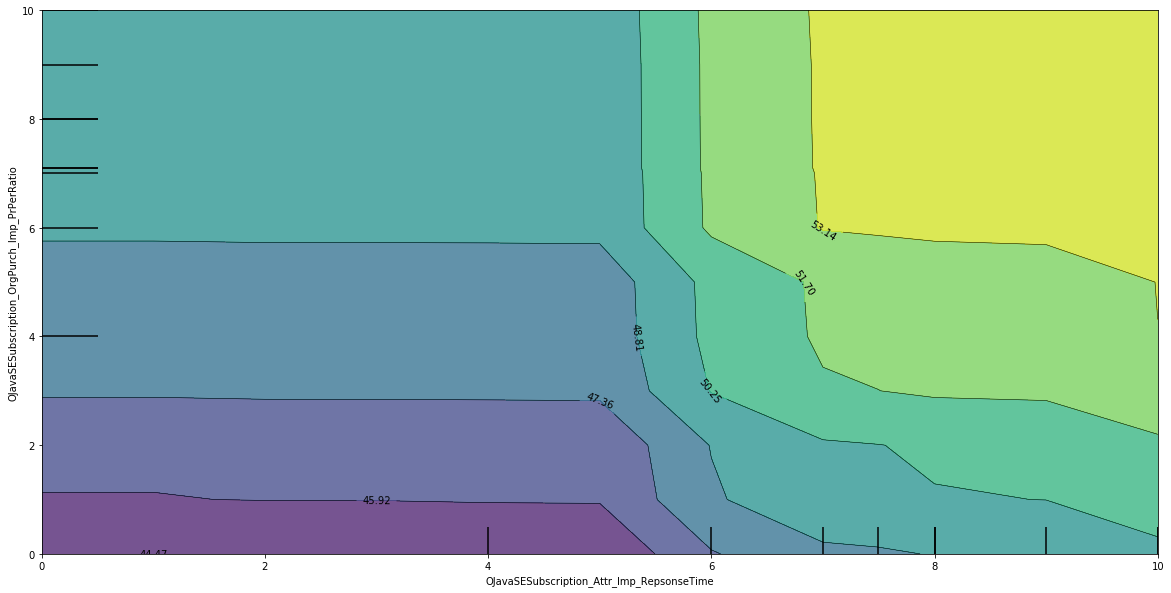

In [188]:
features = [('OJavaSESubscription_Attr_Imp_RepsonseTime','OJavaSESubscription_OrgPurch_Imp_PrPerRatio')]
plot_partial_dependence(clf, X_train, features)

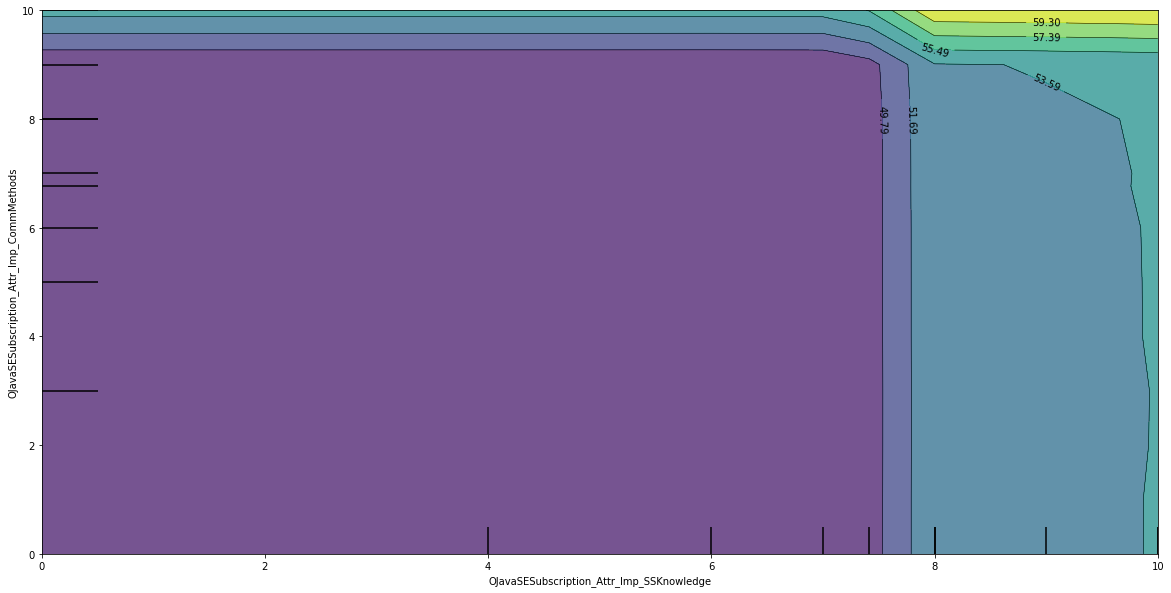

In [191]:
features = [('OJavaSESubscription_Attr_Imp_SSKnowledge',
            'OJavaSESubscription_Attr_Imp_CommMethods')]
plot_partial_dependence(clf, X_train, features)

## y23w_mean

In [193]:
# y2_mean 
# y2w_mean

y_list_list = [[y1w_list + y2w_list + y3w_list], 
              [y1w_list + y2w_list], 
              [y1w_list + y3w_list], 
              [y2w_list + y3w_list],
               y1w_list, 
               y2w_list,
               y3w_list]
y_list_names = ['y123w', 'y12w','y13w','y23w','y1w','y2w','y3w']

i=3

X_drop = [[y1_list + y2_list + y3_list + x1_list + x2_list + x3_list ], 
          [y1_list + y2_list + x1_list + x2_list], 
          [y1_list + y3_list + x1_list + x3_list], 
          [y2_list + y3_list + x2_list + x3_list],
           y1_list + x1_list,  
           y2_list + x2_list,
           y3_list + x3_list]
    
    
y_funct = 'mean'
print(y_list_names[i])

clf,MeanAbsoluteError, accuracy, y_na, varimp0, varimp1, varimp2, X_drop  = rf_pipe (
               mod_df = modw_df, 
               y_list = y_list, # list of response variables, if len()>1, these will be summed or meaned
               X_list = catg_dummy_list + cont_dummy_list + dummy0_dummy_list, 
               y_funct = y_funct, # either None, 'sum' or 'mean'. Must be one of non-None if len(y_list)>1
               X_drop = X_drop[i], # list of additional predictors to drop 
               imp_filename = '../data/output/temp.csv')

X = modw_df.drop(y_list, axis=1, errors='ignore')
X = X[X_list]
X = X.drop(x2_list, axis=1, errors='ignore')
X = X.drop(y2_list, axis=1, errors='ignore')
X = X.drop(x3_list, axis=1, errors='ignore')
X = X.drop(y3_list, axis=1, errors='ignore')
X = X.fillna(X.mean())
X_train, X_test = train_test_split(X, random_state=0)


y23w


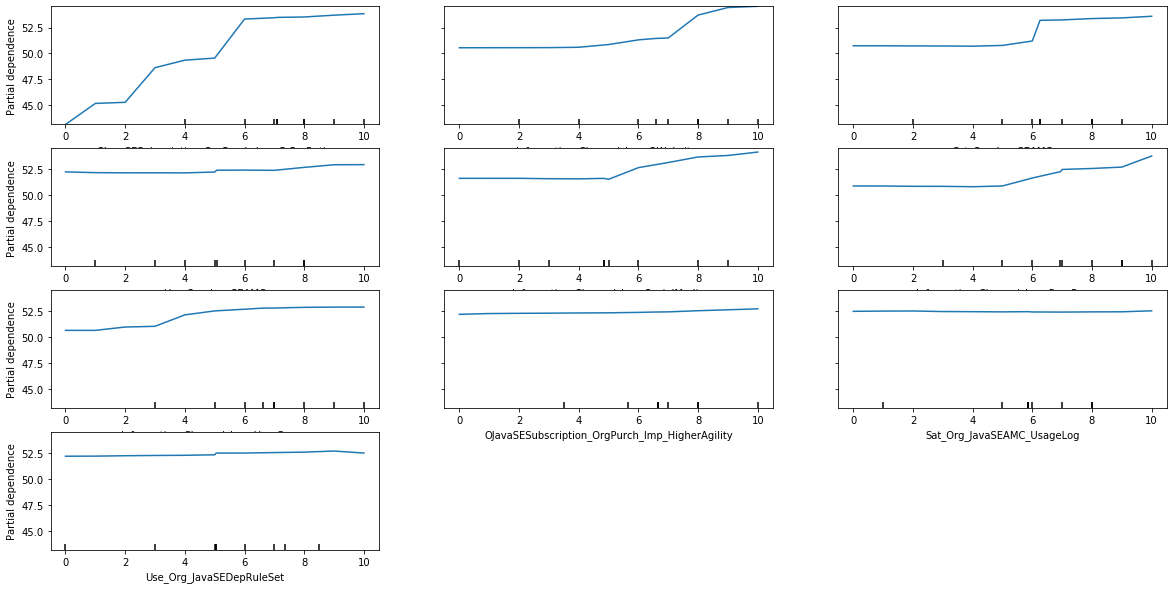

In [194]:
features = ['OJavaSESubscription_OrgPurch_Imp_PrPerRatio',
'Information_Channel_Imp_OWebsites',
'Sat_Org_JavaSEAMC',
'Use_Org_JavaSEAMC',
'Information_Channel_Imp_SocialMedia',
'Information_Channel_Imp_PeerRec',
'Information_Channel_Imp_UserComm',
'OJavaSESubscription_OrgPurch_Imp_HigherAgility',
'Sat_Org_JavaSEAMC_UsageLog',
'Use_Org_JavaSEDepRuleSet']
plot_partial_dependence(clf, X_train, features)

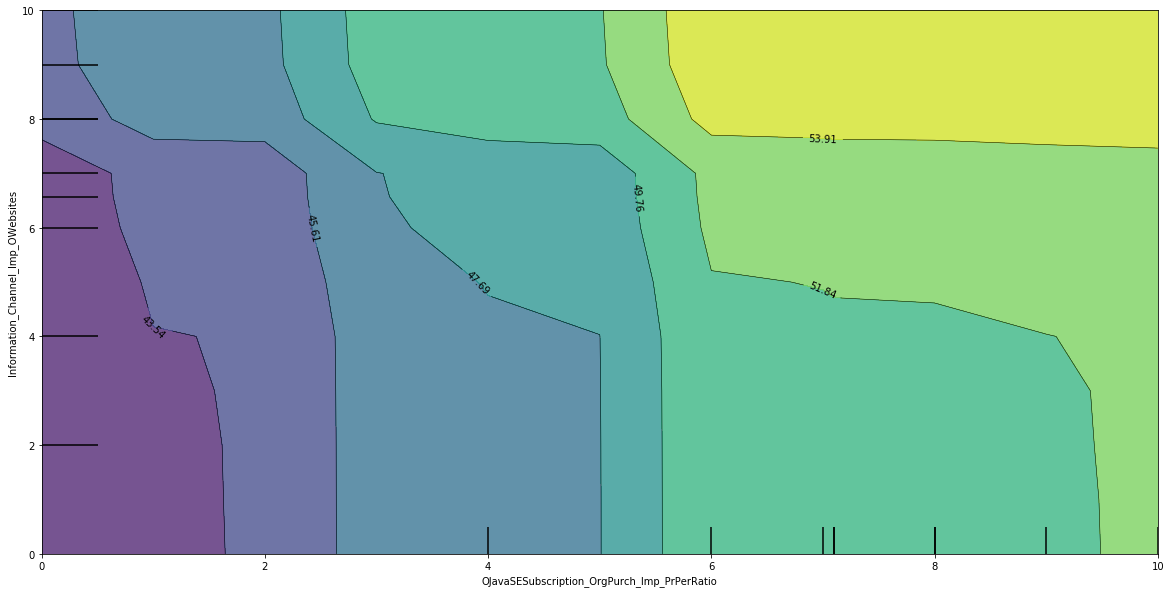

In [195]:
features = [('OJavaSESubscription_OrgPurch_Imp_PrPerRatio',
'Information_Channel_Imp_OWebsites')]
plot_partial_dependence(clf, X_train, features)

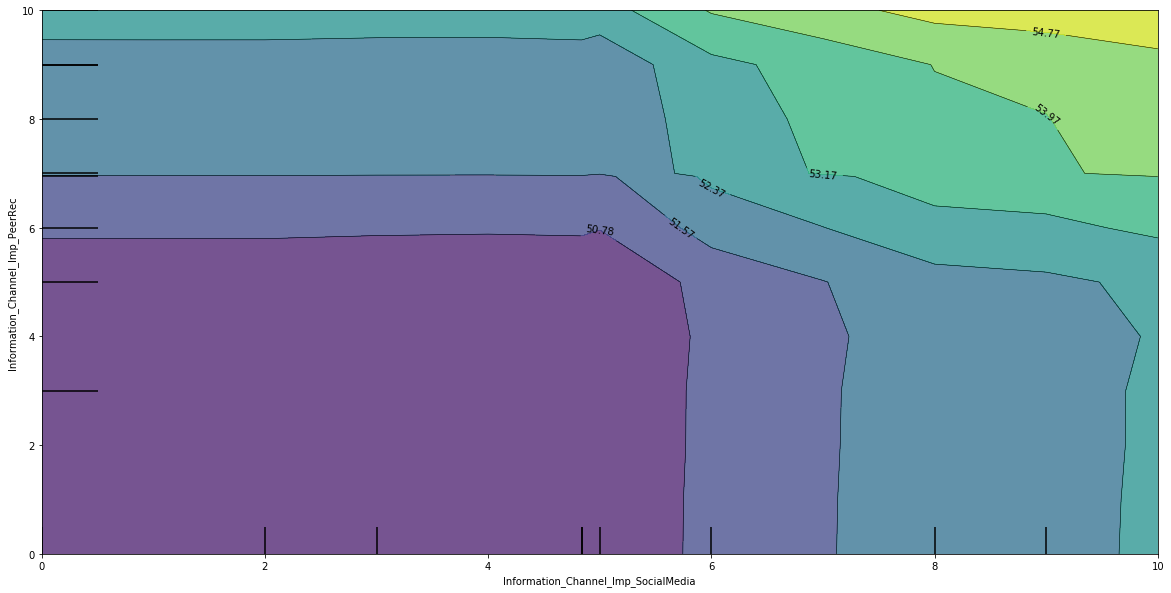

In [199]:
features = [('Information_Channel_Imp_SocialMedia',
'Information_Channel_Imp_PeerRec',)]
plot_partial_dependence(clf, X_train, features)

## y123_w mean

In [380]:
# y2_mean 
# y2w_mean

y_list_list = [[y1w_list + y2w_list + y3w_list], 
              [y1w_list + y2w_list], 
              [y1w_list + y3w_list], 
              [y2w_list + y3w_list],
               y1w_list, 
               y2w_list,
               y3w_list]
y_list_names = ['y123w', 'y12w','y13w','y23w','y1w','y2w','y3w']

i=0

X_list = catg_dummy_list + cont_dummy_list + dummy0_dummy_list

X_drop = [[y1_list + y2_list + y3_list + x1_list + x2_list + x3_list ], 
          [y1_list + y2_list + x1_list + x2_list], 
          [y1_list + y3_list + x1_list + x3_list], 
          [y2_list + y3_list + x2_list + x3_list],
           y1_list + x1_list,  
           y2_list + x2_list,
           y3_list + x3_list]
    
    
y_funct = 'mean'
print(y_list_names[i])

clf,MeanAbsoluteError, accuracy, y_na, varimp0, varimp1, varimp2, X_drop  = rf_pipe (
               mod_df = modw_df, 
               y_list = y_list, # list of response variables, if len()>1, these will be summed or meaned
               X_list = catg_dummy_list + cont_dummy_list + dummy0_dummy_list, 
               y_funct = y_funct, # either None, 'sum' or 'mean'. Must be one of non-None if len(y_list)>1
               X_drop = X_drop[i], # list of additional predictors to drop 
               imp_filename = '../data/output/temp.csv')

X = modw_df.drop(y_list, axis=1, errors='ignore')
X = X[X_list]
X = X.drop(x1_list, axis=1, errors='ignore')
X = X.drop(y1_list, axis=1, errors='ignore')
X = X.drop(x2_list, axis=1, errors='ignore')
X = X.drop(y2_list, axis=1, errors='ignore')
X = X.drop(x3_list, axis=1, errors='ignore')
X = X.drop(y3_list, axis=1, errors='ignore')
X = X.fillna(X.mean())
X_train, X_test = train_test_split(X, random_state=0)


y123w


10


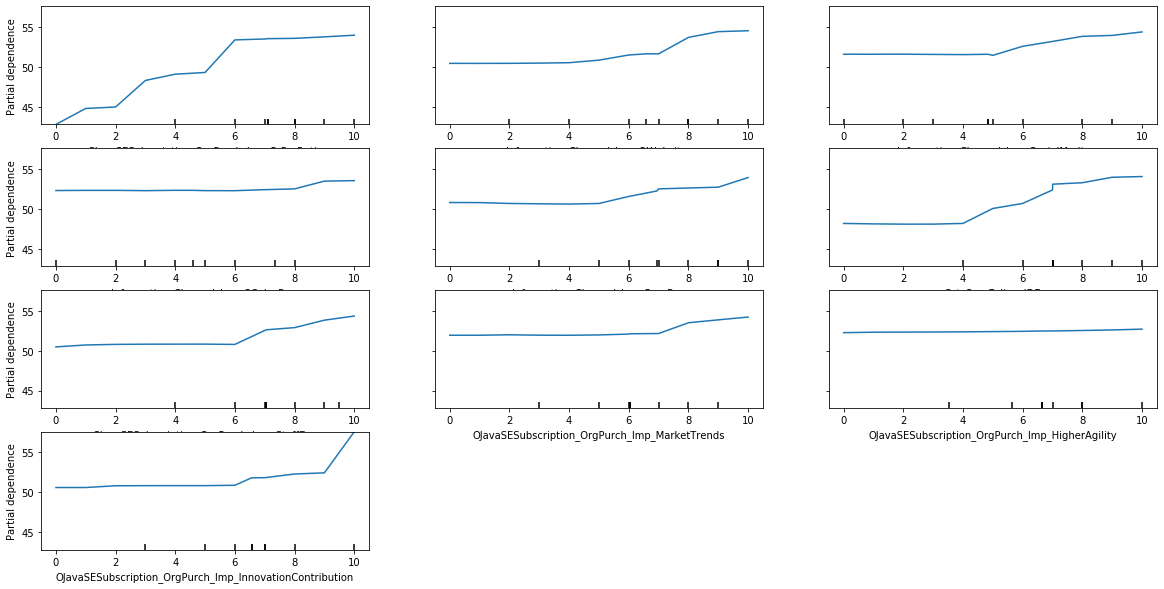

In [381]:
features = ['OJavaSESubscription_OrgPurch_Imp_PrPerRatio',
'Information_Channel_Imp_OWebsites',
'Information_Channel_Imp_SocialMedia',
'Information_Channel_Imp_OSalesPros',
'Information_Channel_Imp_PeerRec',
'Sat_Org_EclipseIDE',
'OJavaSESubscription_OrgPurch_Imp_StaffExp',
'OJavaSESubscription_OrgPurch_Imp_MarketTrends',
'OJavaSESubscription_OrgPurch_Imp_HigherAgility',
'OJavaSESubscription_OrgPurch_Imp_InnovationContribution']
print(len(features))
plot_partial_dependence(clf, X_train, features)

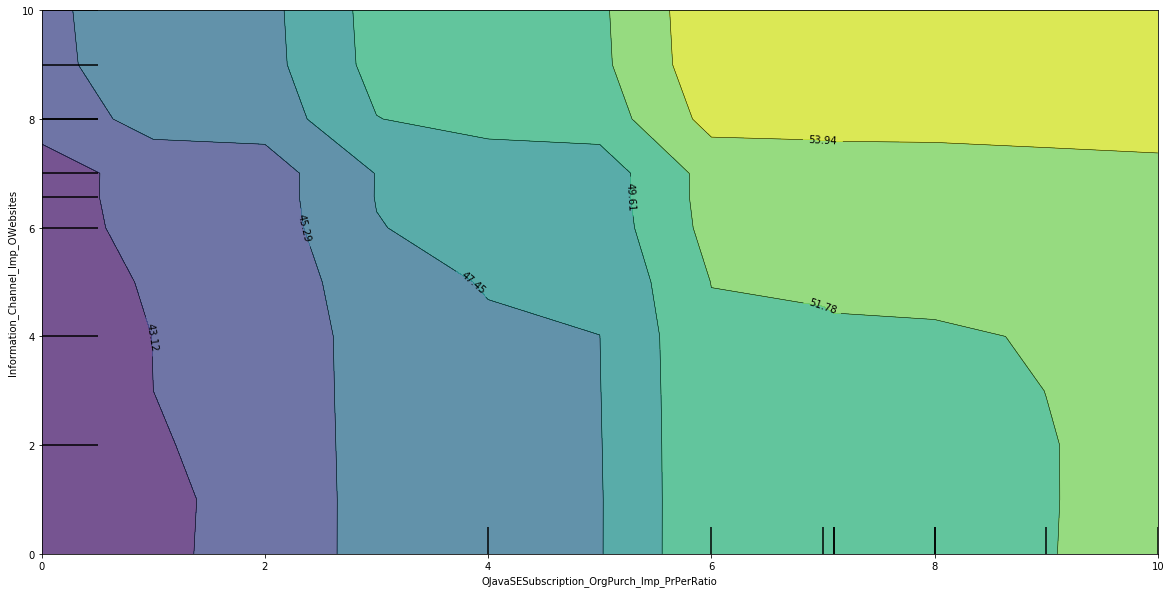

In [207]:
features = [('OJavaSESubscription_OrgPurch_Imp_PrPerRatio',
'Information_Channel_Imp_OWebsites')]
plot_partial_dependence(clf, X_train, features)

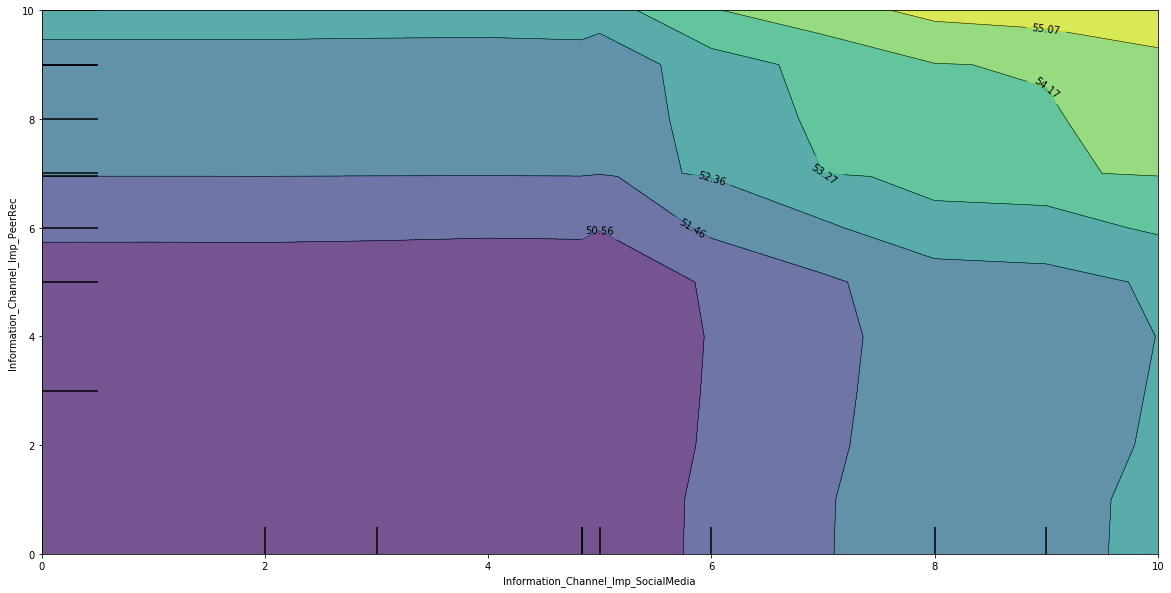

In [210]:
features = [('Information_Channel_Imp_SocialMedia',
'Information_Channel_Imp_PeerRec',)]
plot_partial_dependence(clf, X_train, features)

# Demographic QA
## Focusing only on demographic predictors -- excluding all behavior attitude related predictors.
### Decrease accuracy by 5.3% (66.2% -> 62.7%)

In [230]:
demog_vars = ['Country_Code_AU',
 'Country_Code_CA',
 'Country_Code_CZ',
 'Country_Code_DE',
 'Country_Code_DK',
 'Country_Code_GB',
 'Country_Code_IN',
 'Country_Code_IT',
 'Country_Code_NL',
 'Country_Code_QA',
 'Country_Code_US',
 'Country_Code_VN',
 'Company_Industry_2',
 'Company_Industry_5',
 'Company_Industry_6',
 'Company_Industry_7',
 'Company_Industry_8',
 'Company_Industry_9',
 'Company_Industry_10',
 'Company_Industry_11',
 'Company_Industry_12',
 'Company_Industry_14',
 'Company_Industry_15',
 'Company_Industry_16',
 'Company_Industry_17',
 'Company_Industry_18',
 'Company_Industry_19',
 'Company_Industry_20',
 'Company_Industry_21',
 'Company_Industry_22',
 'Company_Industry_23',
 'Company_Industry_25',
 'Job_Title_1',
 'Job_Title_2',
 'Job_Title_3',
 'Job_Title_4',
 'Job_Title_5',
 'Job_Title_8',
 'Company_Revenue_1',
 'Company_Revenue_2',
 'Company_Revenue_3',
 'Company_Revenue_4',
 'OracleJavaSESubscription_Org_Duration_1',
 'OracleJavaSESubscription_Org_Duration_2',
 'OracleJavaSESubscription_Org_Duration_3',
 'OracleJavaSESubscription_Org_Duration_4',
 'Java_App_Org_Deploy_2020_1',
 'Java_App_Org_Deploy_2020_2',
 'Java_App_Org_Deploy_2020_3',
 'Java_App_Org_Deploy_2020_4',
 'Java_App_Org_Deploy_2020_5',
 'OracleJavaSESubscription_Ind_Role_1',
 'OracleJavaSESubscription_Ind_Role_2',
 'OracleJavaSESubscription_Ind_Role_3',
 'OracleJavaSESubscription_Ind_Role_4',
 'OracleJavaSESubscription_Ind_Role_5',
 'OracleJavaSESubscription_Ind_Role_6',
 'Government_Org_Ind_Employee_1',
 'Government_Org_Ind_Employee_2',
 'App_Dev_Outsource_1',
 'App_Dev_Outsource_2',
 'Platform_Dev_Org_Primary_1',
 'Platform_Dev_Org_Primary_2',
 'Platform_Dev_Org_Primary_3',
 'Platform_Dev_Org_Primary_4',
 'Platform_Dev_Org_Primary_5',
 'Platform_Dev_Org_Primary_6',
 'Platform_Dev_Org_Primary_8',
 'JavaSESub_PrePurchasePeriod_1',
 'JavaSESub_PrePurchasePeriod_2',
 'JavaSESub_PrePurchasePeriod_3',
 'JavaSESub_PrePurchasePeriod_4',
 'JavaSESub_PrePurchasePeriod_5']

In [231]:
y_list_list = [[y1w_list + y2w_list + y3w_list], 
              [y1w_list + y2w_list], 
              [y1w_list + y3w_list], 
              [y2w_list + y3w_list],
               y1w_list, 
               y2w_list,
               y3w_list]
y_list_names = ['y123w', 'y12w','y13w','y23w','y1w','y2w','y3w']

i=0

X_drop = [[y1_list + y2_list + y3_list + x1_list + x2_list + x3_list ], 
          [y1_list + y2_list + x1_list + x2_list], 
          [y1_list + y3_list + x1_list + x3_list], 
          [y2_list + y3_list + x2_list + x3_list],
           y1_list + x1_list,  
           y2_list + x2_list,
           y3_list + x3_list]
    
    
y_funct = 'mean'
print(y_list_names[i])

clf,MeanAbsoluteError, accuracy, y_na, varimp0, varimp1, varimp2, X_drop  = rf_pipe (
               mod_df = modw_df, 
               y_list = y_list, # list of response variables, if len()>1, these will be summed or meaned
               X_list = demog_vars, #catg_dummy_list + cont_dummy_list + dummy0_dummy_list, 
               y_funct = y_funct, # either None, 'sum' or 'mean'. Must be one of non-None if len(y_list)>1
               X_drop = X_drop[i], # list of additional predictors to drop 
               imp_filename = '../data/output/rf_demog_imp_y123w_mean.csv')

X = modw_df.drop(y_list, axis=1, errors='ignore')
X = X[demog_vars]
X = X.drop(x2_list, axis=1, errors='ignore')
X = X.drop(y2_list, axis=1, errors='ignore')
X = X.drop(x3_list, axis=1, errors='ignore')
X = X.drop(y3_list, axis=1, errors='ignore')
X = X.fillna(X.mean())
X_train, X_test = train_test_split(X, random_state=0)


y123w


In [236]:
print(MeanAbsoluteError, accuracy, y_na, varimp0, varimp1, varimp2)

15.23 62.68945808360935 0.21929824561403508 Country_Code_CA, 0.04 Company_Industry_9, 0.04 Job_Title_2, 0.04


### Analyze Var Imp

In [255]:
map_df = pd.read_csv('../data/output/map_df.csv')
map_df.head()

,new,org
0,Response_ID,Response ID
1,IP_Address,IP Address
2,Timestamp,Timestamp (mm/dd/yyyy)
3,Duplicate,Duplicate
4,Time_Complete_s,Time Taken to Complete (Seconds)


In [310]:
newvals = ['Yes','No',
                             'Management of Companies and Enterprises',
 'Manufacturing',
 'Media',
 'Other Services (except Public Administration)',
 'Pharmaceutical',
 'Professional, Scientific, and Technical Services',
 'Public Administration',
 'Real Estate and Rental and Leasing',
 'Retail Trade',
 'Aerospace',
 'Technology',
 'Telecommunications',
 'Transportation and Warehousing',
 'Utilities',
 'Other',
 'Construction',
 'Educational Services',
 'Finance and Insurance',
 'Health Care and Social Assistance',
 'Information Technology ',
           

                            
           'Less than $100M',
                            '$100M to $999M',
                             '$1B to $5B',
                             'More than $5B',
           
                       'AU', 'CA', 'CZ', 'DE', 'DK', 'GB', 'IN', 'IT', 'NL', 'QA', 'US', 'VN',
           
                            'Yes',
                            'No',
           
                            'Only a few days',
                            'Between 1-3 weeks',
                            'Between 1-3 months',
                            'Between 4-6 months',
                            'More then 6 months',
           

          
'Fewer than 10',
'10-50',
'51-100',
'More than 100',
'Don’t know',

          'CIO or CTO',
         'IT Director or Manager',
           'Application Developer',
           'Application Manager',
           'Application Development Lead',
           'Other (Please specify)',
          
          
'I was not at all involved in the evaluation or selection of Oracle Java SE Subscription, but I am actively using the product for managing Java applications',
'I participated in the selection of development platform but do not have direct influence over the selection',
'I was an essential recommender on selection of Oracle Java SE Subscription',
'I am a manager who oversees decision making involving selection of Oracle Java SE Subscription',
"Don't know",
'Other',

'Less than 6 months',
'6 months to 1 year',
'More than 1 year',
"Don’t know",

'Linux (RHEL)',
'Linux (Oracle)',
'Linux Ubuntu',
'Linux (SUSE)',
'Linux (Other)',
'MacOS',
'Windows'


          ]

In [311]:
len(newvals)

73

In [334]:
demog_imp_y123w_mean = pd.read_csv('../data/output/rf_demog_imp_y123w_mean.csv')
demog_imp_y123w_mean = demog_imp_y123w_mean.sort_values('var')
demog_imp_y123w_mean = demog_imp_y123w_mean.join(demog_imp_y123w_mean['var'].str.rsplit('_', 1, expand=True))
demog_imp_y123w_mean = demog_imp_y123w_mean[[0,1,'imp']]
demog_imp_y123w_mean.columns = ['var','val','imp']
demog_imp_y123w_mean = demog_imp_y123w_mean.sort_values(['var','val'], ascending=True)
demog_imp_y123w_mean = demog_imp_y123w_mean.merge(map_df, left_on='var',right_on='new')
demog_imp_y123w_mean = demog_imp_y123w_mean[['var','val','org','imp']]
demog_imp_y123w_mean.columns = ['var','val','Q','imp']
# demog_imp_y123w_mean[['Q','val']]
demog_imp_y123w_mean['A'] = newvals
demog_imp_y123w_mean = demog_imp_y123w_mean[['var','val','Q','A','imp']]

demog_imp_y123w_mean[demog_imp_y123w_mean.imp>0
                    ].sort_values(['var','imp'], 
                                  ascending=False)[['Q','A','imp']].reset_index(drop=True).iloc[21:,]

,Q,A,imp
21,How many Java applications does your organization plan to build or deploy in 2020?,10-50,0.03
22,How many Java applications does your organization plan to build or deploy in 2020?,51-100,0.02
23,How many Java applications does your organization plan to build or deploy in 2020?,More than 100,0.02
24,How many Java applications does your organization plan to build or deploy in 2020?,Fewer than 10,0.01
25,How many Java applications does your organization plan to build or deploy in 2020?,Don’t know,0.01
26,Approximately how long was the period between the time you first became aware of Java SE Subscription to the time that you purchased it?,Only a few days,0.03
27,Approximately how long was the period between the time you first became aware of Java SE Subscription to the time that you purchased it?,Between 1-3 months,0.02
28,Approximately how long was the period between the time you first became aware of Java SE Subscription to the time that you purchased it?,Between 4-6 months,0.02
29,Approximately how long was the period between the time you first became aware of Java SE Subscription to the time that you purchased it?,More then 6 months,0.02
30,Approximately how long was the period between the time you first became aware of Java SE Subscription to the time that you purchased it?,Between 1-3 weeks,0.01


In [320]:
temp = demog_imp_y123w_mean[demog_imp_y123w_mean.imp>0].sort_values(['var','imp'], ascending=False)
temp = temp["var"]+"_"+temp["val"]

2


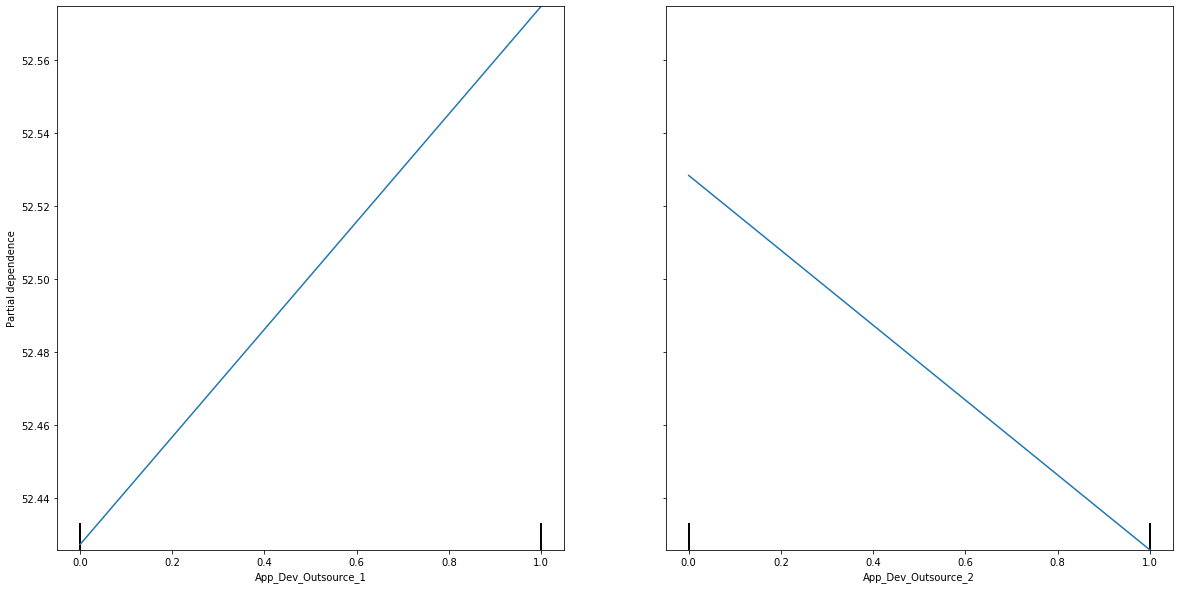

In [342]:
features=temp[temp.str.contains('App_Dev_Outsource')].values
print(len(features))
plot_partial_dependence(clf, X_train, features)

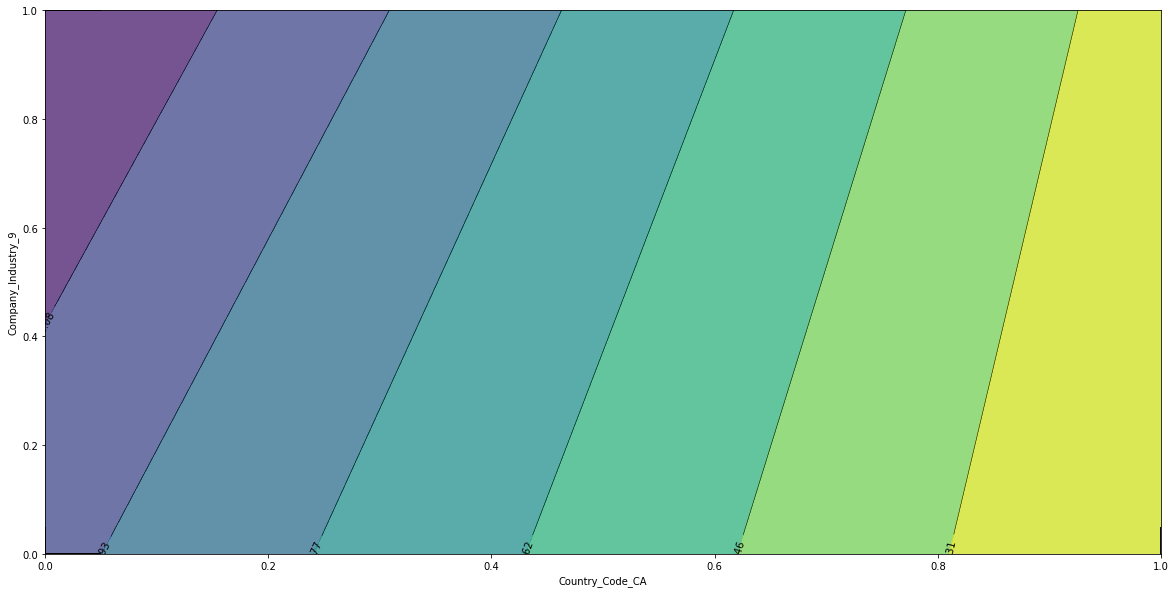

In [239]:
features = [('Country_Code_CA',
'Company_Industry_9')]
plot_partial_dependence(clf, X_train, features)

# Describe Sentiment Metric

In [344]:
y123w_var = modw_df[y1w_list + y2w_list + y3w_list].mean(axis=1,skipna=True)

In [354]:
df1 = y123w_var.describe(include='all')

df1.loc['dtype'] = y123w_var.dtypes
df1.loc['size'] = len(y123w_var)
df1.loc['% count'] = y123w_var.isnull().mean()

print (df1)

count            221
mean         49.5136
std          20.2901
min                0
25%          36.0909
50%          47.9048
75%          63.8571
max             99.5
dtype        float64
size             228
% count    0.0307018
dtype: object


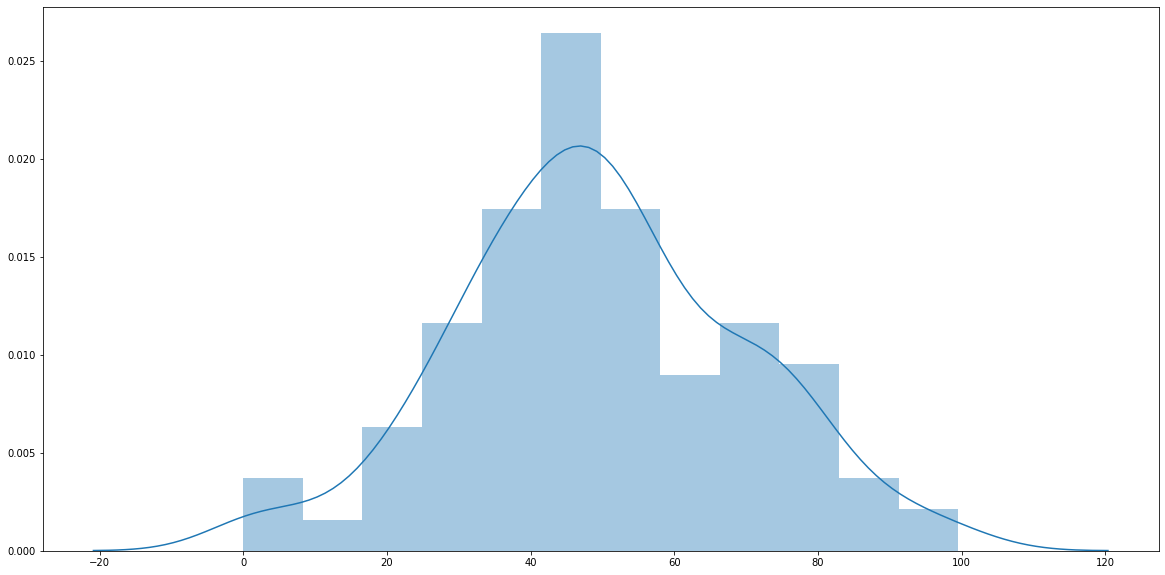

In [356]:
sns.distplot(y123w_var.fillna(y123w_var.mean()))

In [357]:
y2w_var = modw_df[y2w_list].mean(axis=1,skipna=True)

In [360]:
df1 = y2w_var.describe(include='all')

df1.loc['dtype'] = y2w_var.dtypes
df1.loc['size'] = len(y2w_var)
df1.loc['% count'] = y2w_var.isnull().mean()

print (df1)

count           178
mean         53.643
std         20.9441
min               0
25%         38.8083
50%         55.6111
75%          67.675
max             100
dtype       float64
size            228
% count    0.219298
dtype: object


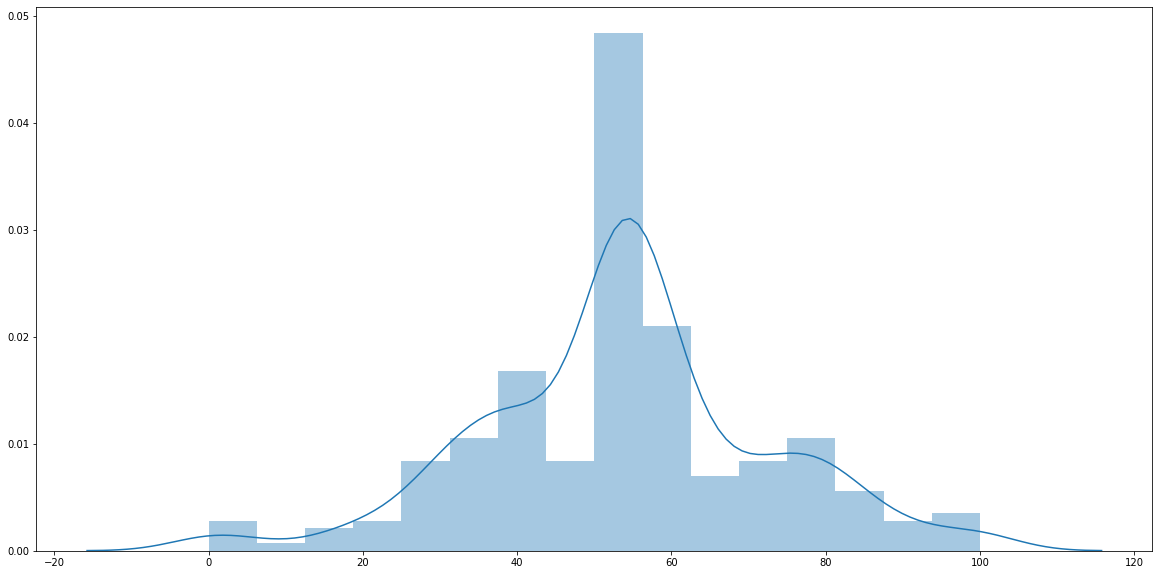

In [361]:
sns.distplot(y2w_var.fillna(y2w_var.mean()))

In [363]:
y23w_var = modw_df[y2w_list + y3w_list].mean(axis=1,skipna=True)

In [364]:
df1 = y23w_var.describe(include='all')

df1.loc['dtype'] = y23w_var.dtypes
df1.loc['size'] = len(y23w_var)
df1.loc['% count'] = y23w_var.isnull().mean()

print (df1)

count            219
mean         52.3912
std          20.8057
min                0
25%          37.3125
50%           52.625
75%          66.2562
max              100
dtype        float64
size             228
% count    0.0394737
dtype: object


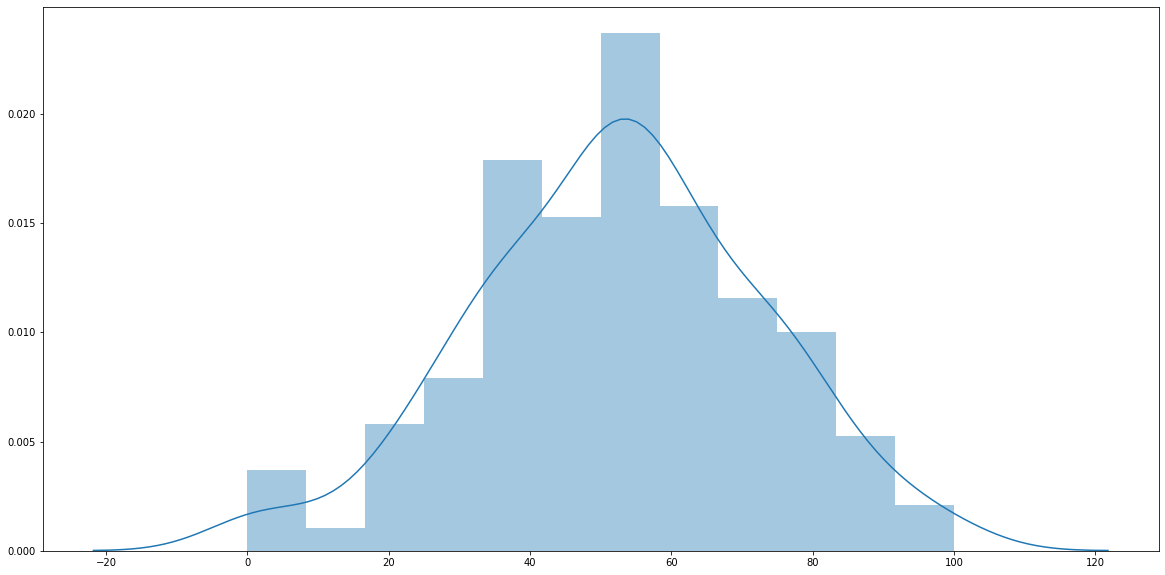

In [366]:
sns.distplot(y23w_var.fillna(y23w_var.mean()))

In [367]:
print(len(y1w_list))
print(len(y2w_list))
print(len(y3w_list))

5
11
6


# Random output Generators

In [374]:
rf_imp_y123w_mean = pd.read_csv('../data/output/rf_imp_y123w_mean.csv')
rf_imp_y123w_mean = rf_imp_y123w_mean.merge(map_df, left_on='var',right_on='new')
rf_imp_y123w_mean.columns = ['var','imp','var_2','Q']
rf_imp_y123w_mean = rf_imp_y123w_mean[['var','Q','imp']]

# demog_imp_y123w_mean = demog_imp_y123w_mean.sort_values('var')
# demog_imp_y123w_mean = demog_imp_y123w_mean.join(demog_imp_y123w_mean['var'].str.rsplit('_', 1, expand=True))
# demog_imp_y123w_mean = demog_imp_y123w_mean[[0,1,'imp']]
# demog_imp_y123w_mean.columns = ['var','val','imp']
# demog_imp_y123w_mean = demog_imp_y123w_mean.sort_values(['var','val'], ascending=True)
# # demog_imp_y123w_mean[['Q','val']]
# demog_imp_y123w_mean['A'] = newvals
# demog_imp_y123w_mean = demog_imp_y123w_mean[['var','val','Q','A','imp']]

# demog_imp_y123w_mean[demog_imp_y123w_mean.imp>0
#                     ].sort_values(['var','imp'], 
#                                   ascending=False)[['Q','A','imp']].reset_index(drop=True).iloc[21:,]
rf_imp_y123w_mean[['Q','imp']]

,Q,imp
0,Please rate the importance of the following reasons driving your organization’s decision to purchase Oracle Java SE Subscription. Please rate each item on a scale from 0 to 10 with 0 = “Not at all important” and 10 = “Extremely important”. Price/Performance Ratio,0.10
1,"On a scale from 0 to 10 with 0 = “Not at all important” and 10 = “Extremely important”, please rate the importance of the information channels that increased your awareness of Oracle Java SE Subscription. Oracle websites",0.07
2,"On a scale from 0 to 10 with 0 = “Not at all important” and 10 = “Extremely important”, please rate the importance of the information channels that increased your awareness of Oracle Java SE Subscription. Social Media outlets (e.g. Twitter, LinkedIn, Facebook, etc.)",0.07
3,"On a scale from 0 to 10 with 0 = “Not at all important” and 10 = “Extremely important”, please rate the importance of the information channels that increased your awareness of Oracle Java SE Subscription. Oracle Sales professionals",0.06
4,"On a scale from 0 to 10 with 0 = “Not at all important” and 10 = “Extremely important”, please rate the importance of the information channels that increased your awareness of Oracle Java SE Subscription. Peers’ recommendations",0.06
5,"Eclipse IDE Level of satisfaction (0-10)[ , ]",0.03
6,Please rate the importance of the following reasons driving your organization’s decision to purchase Oracle Java SE Subscription. Please rate each item on a scale from 0 to 10 with 0 = “Not at all important” and 10 = “Extremely important”. Staff expertise and availability of skills,0.03
7,Please rate the importance of the following reasons driving your organization’s decision to purchase Oracle Java SE Subscription. Please rate each item on a scale from 0 to 10 with 0 = “Not at all important” and 10 = “Extremely important”. Market trends,0.03
8,Please rate the importance of the following reasons driving your organization’s decision to purchase Oracle Java SE Subscription. Please rate each item on a scale from 0 to 10 with 0 = “Not at all important” and 10 = “Extremely important”. Higher agility,0.03
9,Please rate the importance of the following reasons driving your organization’s decision to purchase Oracle Java SE Subscription. Please rate each item on a scale from 0 to 10 with 0 = “Not at all important” and 10 = “Extremely important”. Ability to contribute to ongoing innovation of Java platform,0.03
